## Download a csv from a jupyter notebook

```python
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# Intro to Pandas DataFrames

## Introduction

### What is a data frame?

Simply put, DataFrames are Python's way of displaying data in tablular form.

By using Python's powerful library for Data Analysis - pandas with DataFrames it offers us as users an efficient way to work with large amounts of structured data.

Is it similar to Excel?

Just as Excel use spreadsheets, Python uses pandas dataframes.

> **Python is often preferred over Excel due to its scalability and speed.**

#### How is a DataFrame composed?

So what does a DataFrame look like? It is made up of rows and columns making it two dimensional. Let's take a look below:

We see that our Index is made up of the companies, however an index can also be made up of numbers.

> **An ``Index`` is like an address, it can be used to locate both rows and columns.**

More on that later.

**So, let's jump into our Jupyter notebook and create the DataFrame from this example.**

The dataset for today's lab contains information on the Top Tech Companies in the World as shown below:

Our DataFrame contains five columns: - ``Revenue`` - ``Employees`` - ``Sector`` - ``Founding`` ``Date`` - ``Country``

The syntax to create a dataframe is:

```py
import pandas as pd
pd.DataFrame(data, index)
```

- **data**: These are the values from our dataset.
- **index**: This is like the address of the data we are storing.

## Basic Navigation & Browsing Techniques

So, how do we truely harness the power of pandas DataFrames?

Let's explore some functions:

### head

The ``head()`` method displays the first few rows of your DataFrame, making it easier to get a sense of the overall structure and content. It will display the first five rows by default.

```py
df.head()
```

We can expand our dataset further and specify the number of rows ``.head(n)`` within the brackets, as shown below:

```py
df.head(10)
```

This function is especially useful as you can quickly inspect your DataFrame using the ``head()`` method to ensure that all of the data is stored correctly and as expected.

### tail

The ``tail()`` method is similar to ``head()`` except it displays the last few rows of your DataFrame.

```py
df.tail()
```
Also similar to the ``head()`` we can specify the number of rows we want to display with ``.tail(n)``.

```py
df.tail(10)
```

This is useful for quickly identifying any problems with your dataset, as any errors will most likely be found at the end rather than the beginning.

### info

The ``info()`` method returns a list of all the columns in your DataFrame, along with their names, data types, number of values, and memory usage.

```py
df.info()
```

This makes it easy to gain insight into how much space is being taken up by each column and can help identify potential problems such as missing values or incorrect data types.

### shape

The shape method returns a tuple with the number of rows and columns (rows, columns) in our DataFrame.

```py
df.shape
```

This gives us a quick insight into the dimensionality of our DataFrame.

### describe

The ``describe()`` method displays descriptive statistics for numerical columns in your DataFrame, including the mean, median, standard deviation, minimum and maximum values.

```py
df.describe()
```

This can be very useful for understanding the distribution of values across a specific dataset or column without having to manually calculate each statistic.

### nunique

The ``nunique()`` method counts the number of distinct elements.

```py
df.nunique()
```

This can be very useful for understanding the number of categories we have in a column for example.

### isnull

The ``isnull()`` method detected missing values by creating a DataFrame object with a boolean value of ``True`` for ``NULL`` values and otherwise ``False``.

```py
df.isnull()
```

We can take this one step further by applying the ``sum()`` function to get a total number of ``NULL`` values in our DataFrame.

```py
df.isnull().sum()
```

## Column Selection

Before we begin this section it is important we can differenciate between a Series and a ``DataFrame``.

- A ``Series`` is a single column in a DataFrame
- A ``DataFrame`` is an entire table of data.

Let's take a look at how we can choose these items:

### Select One Column

The ``[]`` operator can be used to select a specific column within a DataFrame. The output is a ``Series``.

```py
df['column_name']
```

### Select One Column and Apply Methods

DataFrame's also allow the user to apply methods on columns, these functions include ``sum()``, ``mean()``, ``min()``, ``max()``, ``median()`` and more.

```py
df['column_name'].sum()
```

### Select Multiple Columns

To select multiple columns, use the ``[]`` operator with a ``list`` of column names as the argument. This creates another ``DataFrame``.

```py
df[['column_name_1', 'column_name_2','column_name_3']]
```

We can save this new DataFrame under a new variable name so that we can come back to it later.

```py
new_df = df[['column_name_1', 'column_name_2','column_name_3']]
```

### Select Multiple Columns and Apply Methods

We can take a shortcut and apply methods on more than one column at the same time.

```py
df[['column_name_1', 'column_name_2','column_name_3']].mean()
```

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame()

In [ ]:
# Lists of data
data = {'Revenue': [274515,200734,182527,181945,143015,129184,92224,85965,84893,
                    82345,77867,73620,69864,63191],
        'Employees': [147000,267937,135301,878429,163000,197000,158000,58604,
                      109700,350864,110600,364800,85858,243540],
        'Sector': ['Consumer Electronics','Consumer Electronics','Software Services',
                   'Chip Manufacturing','Software Services','Consumer Electronics',
                   'Consumer Electronics','Software Services','Consumer Electronics',
                   'Consumer Electronics','Chip Manufacturing','Software Services',
                   'Software Services','Consumer Electronics'],
        'Founding Date':['01-04-1976','13-01-1969','04-09-1998','20-02-1974',
                         '04-04-1975','15-09-1987','01-02-1984','04-02-2004',
                         '07-04-1946','01-01-1910','18-07-1968','16-06-1911',
                         '11-11-1998','07-03-1918'],
        'Country':['USA','South Korea','USA','Taiwan','USA','China','USA','USA',
                   'Japan','Japan','USA','USA','China','Japan']} 
index = ['Apple','Samsung','Alphabet','Foxconn','Microsoft','Huawei',
         'Dell Technologies','Meta','Sony','Hitachi','Intel','IBM',
         'Tencent','Panasonic']

In [ ]:
df = pd.DataFrame(data, index)

In [ ]:
df

1. Output the first four rows of the df using the head function

    Now it's your turn! Try outputting the first four rows of the dataframe using the head function. Store the result in the variable ``head_first_4``.

In [ ]:
head_first_4 = df.head(4)

2. Output the last six rows of the df using the tail function.

    Now try output the last six rows of the dataframe using the tail function. Store the result in the variable ``tail_last_6``.

In [ ]:
tail_last_6 = df.tail(6)

3. Select the column Employees

    Let's practice these skills, select the column ``Employees`` into the variable ``employees_s``. You'll notice that the result of this selection is a ``Series``.

In [ ]:
employees_d = df['Employees']

4. Output the median Employees to the nearest whole number

    Now, take it one step further and find the median of each row for the column ``Employees``. Store the result in the variable ``employees_median``

In [ ]:
employees_median = df['Employees'].median()

5. Calculate the mean for columns Revenue and Employees

    Lastly, let's calculate the mean for the columns ``Revenue`` and ``Employees``. Store the result in the variable ``r_e_mean``.

    Your result should be a Series, and it should look something like:

    ```py
    Revenue      XXX
    Employees    YYY
    dtype: float64
    ```

    > *Round off the mean to the nearest whole number.*

In [ ]:
r_e_mean = df[['Revenue', 'Employees']].mean()

In [ ]:
r_e_mean

## Selection by Index

### Selection by Index - ``loc``

Index selection ``.loc`` is a Python DataFrames method that allows users to select DataFrame rows and columns by their **labels or integer positions**.

> ***It is most commonly used when a user needs to access specific elements within a DataFrame, such as selecting all rows with a specific label or values in a specific column.***

```py
df.loc[row_label, column_label]
```

We can use ``:`` in place of ``row_label`` or ``column_label`` to call all the data.

```py
df.loc[:, column_label]
df.loc[row_label,:]
```

We can also pass multiple columns in place of ``column_label`` or multiple rows in place of ``row_label``.

```py
df.loc[['row_name_1', 'row_name_2','row_name_3'], column_label]
df.loc[row_label,['column_name_1', 'column_name_2','column_name_3']]
```

Slicing is a powerful feature of pandas that enables us to access specific parts of our DataFrame.

> ``start:stop:step``

If we don't specify the step, the default value is 1.

### With column's
```py
df.loc[`row_label`, `column_name_start`:`column_name_stop`]
```
### With rows's
```py
df.loc[`row_name_start`:`row_name_stop` , `column_label`]
```
### With step
```py
df.loc[`row_label`, `column_name_start`:`column_name_stop`:n]

df.loc[`row_name_start`:`row_name_stop`:n , `column_label`]
```
### With step and :
```py
df.loc[:`, `column_name_start`:`column_name_stop`:n]

df.loc[`row_name_start`:`row_name_stop`:n , :]
```

In [ ]:
# Find the revenue for Samsung 

# loc[row_label, column_label]

df.loc['Samsung','Revenue']

In [ ]:
# loc[row_label, column_label]

df.loc[:,'Revenue']

In [ ]:
# row_label
df.loc['Samsung',:]

In [ ]:
# column_label
df.loc[:, 'Revenue']

In [ ]:
# Multiple columns
df.loc[['Apple','Samsung','Sony'], 'Revenue']

In [ ]:
# Multiple rows
df.loc['Apple', ['Employees','Country']]

In [ ]:
rows = ['Apple','Samsung','Sony']
columns = ['Employees','Sector','Country']

In [ ]:
# loc[row_label, column_label]

df.loc[rows,columns]

Slicing ``start:stop:step``

With columns

In [ ]:
df.loc['Apple', 'Employees':'Founding Date']

With ``rows``

In [ ]:
df.loc['Apple':'Sony', 'Employees']

With ``step``

In [ ]:
df.loc['Apple':'Sony':2, columns]

With ``step`` and ``:``

In [ ]:
df.loc['Apple':'Sony':2, :]

6. Select the Revenue, Employees & Sector for the companies Apple, Alphabet and Microsoft

    Now let's leverage your ``.loc`` selection skills. Your task is to select the columns ``Revenue``, ``Employees`` & ``Sector`` for the companies Apple, Alphabet and Microsoft. Your result should be stored in a variable ``index_selection`` and it should be a DataFrame looking something like:

In [ ]:
index_selection = df.loc[['Apple','Alphabet','Microsoft'],['Revenue','Employees','Sector']]

## Selection by Position

Selection by position ``.iloc`` is a useful Python DataFrames method that allows users to select rows and columns of a DataFrame **based on their integer positions**.

> ***This is especially useful when users need to access elements within a DataFrame that do not have labels or specific column names.***

```py
df.iloc[row_position, column_position]
```

We can use ``:`` in place of ``row_position`` or ``column_position`` to call all the data.

```py
df.iloc[:, column_position]

df.iloc[row_position,:]
```

We can also pass multiple columns in place of ``column_position`` or multiple rows in place of ``row_position``.

```py
df.iloc[['row_position_1', 'row_position_2','row_position_3'], column_position]

df.iloc[row_position,['column_position_1', 'column_position_2','column_position_3']]
```

**Slicing** is a powerful feature of pandas that enables us to access specific parts of our ``DataFrame``.

> ``start:stop:step``

### With column's
```py
df.iloc[`row_position`, `column_position_start`:`column_position_stop`]
```

### With rows's
```py
df.iloc[`row_position_start`:`row_position_stop` , `column_position`]
```

### With step
```py
df.iloc[`row_position`, `column_position_start`:`column_position_stop`:n]

df.iloc[`row_position_start`:`row_position_stop`:n , `column_position`]
```

### With step and :
```py
df.iloc[:`, `column_position_start`:`column_position_stop`:n]

df.iloc[`row_position_start`:`row_position_stop`:n , :]
```

In [ ]:
# Find the revenue for Samsung 
df.iloc[1, 0]

Notice if we use ``:`` in place of ``row_position``, it will again return all the data from the specified column.

Thus, we have a ``Series``

In [ ]:
df.iloc[:,0]

Let's now use ``:`` in place of ``row_position`` or ``column_position``

In [ ]:
# row_position
df.iloc[1,:]

In [ ]:
# column_position
df.iloc[:,0]

Let's select a ``list`` of values this time:

In [ ]:
# Multiple columns
df.iloc[[0,1,8], 0]

In [ ]:
# Multiple rows
df.iloc[0, [1,4]]

In [ ]:
rows_i = [0,1,8]
columns_i = [1,2,4]

In [ ]:
df.iloc[rows_i,columns_i]

Slicing start:stop:step:

### With columns

In [ ]:
df.iloc[0, 1:4]

### With rows

In [ ]:
df.iloc[0:8, 1]

### With step

In [ ]:
df.iloc[0:9:2, columns_i]

### With ``step`` & ``:``

In [ ]:
df.iloc[0:9:2, :]

7. ***Using Position Selection, select the Revenue, Employees & Country for the companies ``Samsung``, ``Foxconn`` and ``Huawei``.***

In [ ]:
df.iloc[[1,3,5],[0,1,4]]

# Mastering DataFrame Mutations with Hollywood data

## Introduction

In this lab, you'll engage with an actual dataset, applying various data manipulation techniques. Our focus will be a movie dataset, including information like the film title, release year, budget, gross earnings, and more.

This lab will cover the following:

- Creating new columns in a data frame by doing basic arithmetic operations (addition, subtraction, division) on existing columns.
- Creating new columns in a data frame by applying boolean operations (less-than ``<``, greater-than ``>``, equals ``==``, etc.) on existing columns.
- Deleting rows based on specific conditions.
- Removing single or multiple columns based on conditions.

Let's start by loading our dataset.

You can do this by using the ``pandas.read_csv()`` function to load the dataset into a pandas dataframe. Afterwards, store the dataframe in a variable named ``df``.

Here is a sample code:

```py
import pandas as pd

df = pd.read_csv("movies.csv")
df
```

> ***IMPORTANT NOTE: Please ensure you complete all activities in the lab in sequence. Each activity builds on the one before it, so skipping an activity will prevent further progress. Complete each task fully before moving on to the next for a successful learning experience.***

In [ ]:
import pandas as pd

df = pd.read_csv("movies.csv")

In [ ]:
df.columns

In [ ]:
df.head()

## Activities

1. **Create a new column ``revenue``**

    Add a new column named ``revenue`` to the dataframe ``df``. This new column should reflect the difference between the values in the ``gross`` and ``budget`` columns.

In [ ]:
df['revenue'] = df['gross'] - df['budget']

In [ ]:
df.head()

2.  **Create a new column ``percentage_profit``**

    Create a new column called ``percentage_profit``. You will calculate its values as the proportion of the gross earnings out of the total revenue for each row. For example, if the gross earning is 100 million out of a total revenue of 200 million, the ``percentage_profit`` will be 50%.

    - Express profit percentage as a percentage.

In [ ]:
df['percentage_profit'] = df['revenue']/df['gross']*100

3. **Create a new column ``high_budget_movie``**

    Add a new column named ``high_budget_movie`` to dataframe ``df``. This column should label each movie with ``True`` if it has a budget over 100 million, or ``False`` if it does not.

In [ ]:
df['high_budget_movie'] = df['budget'] > 100_000_000

4. **Create a new column ``successful_movie``**

    Add a new column named ``successful_movie``. Assign it the value ``True`` if a movie's ``percentage_profit`` exceeds 50. If it doesn't, assign ``False``.

In [ ]:
df['successful_movie'] = df['percentage_profit'] > 50

5. **High-Rated Movies**

    Create a new column called ``high_rated_movie``. If the movie's ``score`` is more than 8, label it as ``True``. If not, label it as ``False``.

In [ ]:
df['high_rated_movie'] = df['score'] > 8

6. **Create a new column ``is_new_release``**

Create a new column named ``is_new_release``. This column should indicate ``True`` if the year column's value is beyond 2020, and ``False`` if it's not.

In [ ]:
df['is_new_release'] = df['year'] > 2020

7. **Create a new column ``is_long_movie``**

    Create a new column ``is_long_movie`` which is True if the value of runtime column is greater than 150 minutes and ``False`` otherwise.

In [ ]:
df['is_long_movie'] = df['runtime'] > 150

8. **Drop unsuccessful movie**

    Delete all rows in the dataframe df where the column ``successful_movie`` is labeled as ``False``. Use the inplace attribute to make sure these modifications are permanent.

In [ ]:
df = df[df["successful_movie"] == True]

In [ ]:
df.drop(df.loc[df['successful_movie'] == False].index, inplace=True)

9. **Drop high budget movie**

    Create a new dataframe named ``low_budget_df`` by removing all rows from the original dataframe where the ``budget`` value exceeds 100 million. Remember, changes shouldn't affect the original dataframe.

In [ ]:
low_budget_df = df[df['budget']<100_000_000]

10. Removing Low-Voted Movies

    Remove all the rows from the dataframe where the ``votes`` count is below ``1000``. Assign this updated dataframe to a new variable named ``high_voted_df``. Ensure you do not make these changes to the original dataframe.

In [ ]:
high_voted_df = df[df['votes']>1000]

11. **Drop the column ``budget``**

    To delete the ``budget`` column from the movie dataframe, apply the drop method and include the column's name, ``budget``. Make sure to specify the axis to show you're referring to a column, not a row. Also, set the inplace ``parameter`` to ``True`` so the change isn't temporary but permanent.

In [ ]:
df.drop(columns = ['budget'], inplace=True)

12. Drop the director and writer columns from the dataframe.

    Remove the ``director`` and ``writer`` columns from the dataframe ``df``. To do this, employ the drop method, designating ``director`` and ``writer`` as the column names. Set the axis to confirm that these are columns not rows. Make sure to adjust the ``inplace`` parameter to ``False``, this way you're forming a new dataframe named ``new_df`` without altering the original one.

    Please remember, in this activity, your task is to build a new dataframe named ``new_df``.

In [ ]:
new_df = df.drop(['director', 'writer'], axis=1, inplace=False)

In [ ]:
new_df = df.drop(columns=['director','writer'])

13. Drop Out Low-Rated and Low-Voted Movies

    Drop all the rows where the value of score is less than ``5`` and the value of votes is less than ``1000``. Drop the rows from the original dataframe ``df``.

In [ ]:
index_low = df.loc[(df['score'] < 5) & (df['votes'] < 1000) ]
df.drop(index_low.index, inplace=True)

14. **Top High-Rated Movies**

    Create a new DataFrame named ``top_rated_movies``, which should include the top five highly-rated movies. Sort this DataFrame based on the ``score`` column in descending order.

In [ ]:
top_rated_movies = df.sort_values(ascending=False, by=['score'])[0:5]

In [ ]:
top_rated_movies

15. Removing Specific Rows

    Remove rows with index ``2`` and ``10`` from the DataFrame ``df``.

In [ ]:
df.drop([2,10], inplace=True)

16. Sci-Fi Blockbusters

    Create a new DataFrame named ``sci_fi_blockbusters`` containing movies that are 'Sci-Fi' genre and have a gross greater than $150 million.

In [ ]:
sci_fi_blockbusters = df[(df['genre'] == 'Sci-Fi') & (df['gross'] > 150_000_000)]

17. **Age of Movies**

    Create a new column named ``age`` to calculate the age of the movie in years. Find it by subtracting the ``year`` column from the current year.

    Consider 2023 as the current year.

In [ ]:
df['age'] = 2023 - df['year']

In [ ]:
df.head()

18. **Movies Released in Summer**

    Create a new DataFrame containing movies released in June, July, or August. Store the result in dataframe ``summer_movies``.

In [ ]:
summer_movies = df[(df['released'].str.contains('June')) | (df['released'].str.contains('July')) | (df['released'].str.contains('August'))]

In [ ]:
summer_movies

# Modifying DataFrames: Creating columns and more

In this lab we'll cover the most common types of operations to "modify" dataframes. This includes:

- Creating new columns
- Deletion: deleting rows or columns
- Modifications: renaming columns, changing column types, modifying values
- Adding new rows

In the process, we'll also learn the important concepts of mutability/immutability and how to perform a "safe" Data Science workflow (spoiler: by avoiding modifications!)

> ***IMPORTANT NOTE: If you accidentally made incorrect modifications to the dataframe in this lab, you will need to redo all the previous steps in order to successfully complete the activity.***

## Creating new Columns

We'll start with one of the most straightforward operations: creating new columns. We can create new columns in multiple ways, but let's start with the most common one:

### Expressions (and vectorized operations)

The most common way to create a column is just as the result of an expression of other columns within the same DataFrame. If you're familiar with spreadsheets, this is a simple operation:

The syntax is extremely intuitive, it's just assigning "the new column" to a given expression:

```py
df["New Column Name"] = [EXPRESSION]
```
In this case, the expression can be anything. Examples:

```py
# A  simple arithmetic expression between two columns
df["New Column Name"] = df["Column 1"] + df["Column 2"]

# A boolean expression
df["New Column Name"] = df["Column 1"] > 1000

# A more advanced expression multiple columns
df["New Column Name"] = df["Column 1"] * (df["Column 2"] / df["Column 3"]) / df["Column 4"].std
```

Let's use our sample DataFrame to calculate "Revenue per Employee" (as in the GIF above). The expression is just:

```py
df["Revenue per Employee"] = df["Revenue"] / df["Employees"]
```

We call these expressions "vectorized operations", as they act upon the whole dataframe, regardless if it has 100 rows, or 1 billion. Vectorized Operations are extremely fast, even with large number of data.

In [ ]:
import pandas as pd

In [ ]:
# Lists of data
data = {'Revenue': [274515,200734,182527,181945,143015,129184,92224,85965,84893,
                    82345,77867,73620,69864,63191],
        'Employees': [147000,267937,135301,878429,163000,197000,158000,58604,
                      109700,350864,110600,364800,85858,243540],
        'Sector': ['Consumer Electronics','Consumer Electronics','Software Services',
                   'Chip Manufacturing','Software Services','Consumer Electronics',
                   'Consumer Electronics','Software Services','Consumer Electronics',
                   'Consumer Electronics','Chip Manufacturing','Software Services',
                   'Software Services','Consumer Electronics'],
        'Founding Date':['01-04-1976','13-01-1969','04-09-1998','20-02-1974',
                         '04-04-1975','15-09-1987','01-02-1984','04-02-2004',
                         '07-04-1946','01-01-1910','18-07-1968','16-06-1911',
                         '11-11-1998','07-03-1918'],
        'Country':['USA','South Korea','USA','Taiwan','USA','China','USA','USA',
                   'Japan','Japan','USA','USA','China','Japan']} 
index = ['Apple','Samsung','Alphabet','Foxconn','Microsoft','Huawei',
         'Dell Technologies','Meta','Sony','Hitachi','Intel','IBM',
         'Tencent','Panasonic']

In [ ]:
df = pd.DataFrame(data, index=index)

In [ ]:
df

In [ ]:
df["Revenue per Employee"] = df["Revenue"] / df["Employees"]

In [ ]:
df.head()

1. **Creating a new column**

    The column ``Revenue`` is expressed in *millions of dollars*. Create a new one, ``Revenue in $`` with the values for revenue expressed in $US Dollars (single units).

In [ ]:
df['Revenue in $'] = df['Revenue']*1_000_000

2. **Create a new column: ``Is American?``**

    Create a new boolean column ``Is American?`` that contains the value ``True`` for companies which Country is USA, and ``False`` otherwise.

In [ ]:
df['Is American?'] = df['Country'] == 'USA'

## Creating Columns out of Fixed Values

### Single (hardcoded) value

We can create columns by also providing values directly. In its simplest form, we just assign the new column to a hardcoded value:

```py
df["New Column"] = VALUE
```

This will set EVERY rows in the dataframe with that given value. In our notebook, we're setting the value ``Is Tech?`` to "Yes".

### Collection of values

Instead of providing just one value for the entire dataframe (and for every single row), we can provide a more "granular" collection containing the value for each row we want to assign.

Let's look at the example in the associated notebook. In the variable ``stock_prices`` we're storing the stock prices of the given companies. We'll then assign the values to the column ``"Stock Price"`` directly:

```py
stock_prices = [143.28, 49.87, 88.26, 1.83, 253.75, 0,
                43.4, 167.32, 89.1, 52.6, 25.58, 137.35, 48.23, 8.81]

df['Stock Price'] = stock_prices
```

This works because the list ``stock_prices`` contains the same number of elements as in the DataFrame.

> ***Note: The stock prices here are estimate. Not all companies are listed in the same exchange, so we just estimated the value in dollars. Also, ``Huawei`` is not publicly listed, so we assigned a value of $0.***

In [ ]:
df['Is Tech?'] = "Yes"

In [ ]:
df.head()

In [ ]:
stock_prices = [143.28, 49.87, 88.26, 1.83, 253.75, 0,
                43.4, 167.32, 89.1, 52.6, 25.58, 137.35, 48.23, 8.81]

In [ ]:
df['Stock Price'] = stock_prices

In [ ]:
df.head()

## Activities

3. Create a new column with the CEOs of each company

    Create new column ``CEO`` that contains the names of the CEOs of each company. You'll find the list of the CEOs in the associated notebook.

In [ ]:
ceo_list = [
    "Tim Cook", "Kim Ki Nam", "Sundar Pichai",
    "Young Liu", "Satya Nadella", "Ren Zhengfei",
    "Michael Dell", "Mark Zuckerberg",
    "Kenichiro Yoshida", "Toshiaki Higashihara", "Patrick Gelsinger",
    "Arvind Krishna", "Ma Huateng", "Yuki Kusumi"]

In [ ]:
df['CEO'] = ceo_list

In [ ]:
df.head()

### Deleting Columns with `del`

There are mainly two ways of deleting columns, using the ``del`` keyword and with the drop method. For now we'll focus only on the del keyword as the drop method introduces a few more complexities that we'll need to address later.

The ``del`` keyword is the simplest and most intuitive expression, just: ``del df["Column Name"]``. It will modify the underlying dataframe, so use it carefully!

For example, let's delete the column Is Tech? that we created before.
```py
del df["Is Tech?"]
```
Take a look now at the dataframe and see the column is no longer there.

4. Delete the column CEO

    Using the ``del`` keyword, delete the column ``CEO``.

In [ ]:
del df['CEO']

In [ ]:
df.head()

## Mutability and Immutability

This is a **VERY important** concept in Data Science (and programming in general). When solving problems, we usually have the option to resolve them with a "mutable" solution, that is, modifying (or *mutating*) the underlying dataframe, or with an *immutable* solution, which performs the changes but without modifying the underlying data.

For example, most of the String methods in Python are **immutable**. You can perform a wide variety of operations (``replace``, ``title``, ``upper``, ``lower``, etc) but the original string is NOT modified, these operations return NEW strings (new copies) with the desired changes applied. Take a look at the notebook for a few of these strings examples and pay attention at how the string ``s`` is not modified after any of the operations.

### Favor Immutability`

Python's decision for strings (and other, non mentioned modules) is not a coincidence. Most of the time (and only under rare exceptions), we **should prefer immutable solutions**. Specially in Pandas, operations that don't modify the underlying DataFrames or Series. That way, you can always safely try things without the risk of losing important data.

Here's an example of the flow you should expect when performing immutable operations (don't worry about the methods below, we'll learn about them in this and other projects):

```py
df = df.read_csv()
df_renamed = df.rename(...) # rename columns
df_notna = df_renamed.dropna(...)  # dropping null values
df_cleaned = df_notna.drop(...)  # dropping some values
```

As you can see, the result of each operation is the "entry point" of the following operation, creating a chain. This is intentional, because, as you'll see, we'll use this "chaining" to our advantage. It's pretty common to see expressions that are a combination (chaining) of multiple methods one after the other:

```py
df.dropna().drop([...]).rename([...]).sort_values().head()
```

### The ``inplace`` parameter

Before moving forward, we need to make a special mention about the inplace parameter.

The ``inplace`` parameter is EVERYWHERE in pandas methods, both for DataFrames and Series. For example, ``df.dropna(inplace=True)``, ``df.drop([...], inplace=True)``, ``df.drop_duplicates(inplace=True)``, etc.

The inplace parameter changes the behavior of a given method from immutable (default) to mutable, modifying the underlying DataFrame. Again, by default, ``inplace`` is always ``False``, as Pandas is always favoring immutability. You can alter that behavior by setting ``inplace=True``, although, as we just mentioned, it's NOT recommended, except in some special cases.

Now, let's move to the next section to put these concepts to use!

## Deleting rows

The method to delete "arbitrary" rows is: ``.drop``. It has some variations, as it can also be used to delete columns, but let's start with the basics.

The ``.drop()`` method accepts the indices of the values we want to remove, and as we previously mentioned, by default, is **immutable**.

In the notebook you can see an example of deleting multiple rows:

```py
df.drop(["Microsoft", "Tencent", "Samsung", "Alphabet", "Meta", "Hitachi", "Apple"])
```

Again, this method **is IMMUTABLE**. It doesn't modify the underlying dataframe: it immediately returns a new DataFrame with the modifications done. The common pattern is to assign the results of ``.drop`` to a variable: ``df_new = df.drop(...)``. This allows us to re-play any operation if we find a mistake in the process.

5. Drop Microsoft from the df

    Using ``.drop``, delete ``Microsoft`` and assign the result to ``df_no_windows``. IMPORTANT, you should NOT modify ``df``.

In [ ]:
df_no_windows = df.drop('Microsoft')

In [ ]:
df_no_windows.head()

### Mutable modification with ``inplace``

We have iterated and reiterated the importance of favoring immutable solutions. But still, we need to cover how to perform mutable solutions. Just remember, use mutability as spare as possible.

As we've mentioned, most pandas operations accept the ``inplace`` parameter, which, when passed a ``True`` value, will perform such operation modifying the underlying DataFrame. We'll do it now with the .``drop()`` parameter. Switch to the notebook to see how we're deleting the value for Huawei:

```py
df.drop("Huawei", inplace=True)
```

As you can see, the method doesn't return anything (just ``None``). It doesn't provide a result, as the result of the operation, is already applied to the underlying DataFrame. Check again the ``df`` to see that we have correctly deleted ``Huawei`` from the DataFrame.

6. Delete ``inplace`` the values for ``IBM`` and ``Dell``
    
    Perform a mutable operation and delete the rows containing information for ``IBM`` and ``Dell Technologies``.

In [ ]:
df.drop(['IBM','Dell Technologies'], inplace = True)

## Deleting rows based on a condition

Deleting rows based on a condition is simple, as we'll just use the same ``.drop()`` method as before. What might be a little bit more "complicated" is the final syntax that will result from writing these conditions.

First all, remember that the ``.drop()`` method receives the index of the values we want to delete. Let's say we want to delete the companies with Revenue of LESS than ``M$80,000``. Those companies are ``Intel``, ``Tencent`` and ``Panasonic``. So, we have to finally arrive to an expression that is equivalent to:
```py
df.drop(["Intel", "Tencent", "Panasonic"])
```

How do we do that with conditions? It involves two steps:

First, let's write the condition:
```py
df.loc[df["Revenue"] < 80_000]
```
But then, we need the index for the result of that condition. So we append the .index to the end of the condition. So, the final expression ends up being:
```py
df.drop(df.loc[df["Revenue"] < 80_000].index)
```
That, as we said before, is not the most pleasing syntactical experience.


7. Delete companies with revenue lower than the mean

    Drop the companies that have a value of ``Revenue`` lower than the mean (average ``Revenue``). Do NOT modify the original DataFrame; store the new results in ``df_high_revenue``.

In [ ]:
df['Revenue'].mean()

In [ ]:
df_high_revenue = df.drop(df.loc[df['Revenue'] < df['Revenue'].mean()].index)

8. Drop the companies that are NOT from the ``USA``

    Drop the companies whose country is NOT ``USA``. Store the results in the variable ``df_usa_only``.

In [ ]:
df_usa_only = df.drop(df.loc[~df['Is American?']].index)

In [ ]:
df_usa_only

9. Japanese companies sorted by Revenue (desc)

    Using chaining methods, perform the following two operations in the same expression: * drop all the companies that are NOT Japanese * sort them by Revenue in descending order

    Store your results in the variable ``df_jp_desc``

In [ ]:
df_jp_desc = df.drop(df.loc[df['Country'] != 'Japan'].index).sort_values(by ='Revenue' ,ascending = False)

In [ ]:
df_jp_desc

### Removing columns with ``.drop()``

Finally, it's worth mentioning that the ``.drop()`` method can be used to delete columns as well, as an immutable alternative to ``del``. The syntax is the same as removing rows, but to indicate that we want to delete columns, we must pass ``axis=1`` as a parameter. By default, the axis parameter is ``0``, which means "delete at row level"; by setting it to ``1`` we're indicating we're deleting columns.

In [ ]:
df.drop(['Revenue', 'Employees'], axis=1)

# Exploring DataFrames with Pokemon Data

In this project, we'll explore the basics of DataFrames using a Dataset containing Pokemon information.

We'll start by reading the dataset using the ``pd.read_csv()`` method.

Then, the ``df.head()`` and ``df.info()`` methods gives us a bit more information about the underlying data.

Play around with it and once you're ready, jump to the next page to complete the activities.

## Basic Activities

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


1. How many rows has our DataFrame?

    How many total rows do we have in ``df``?

In [8]:
df.shape[0]

721

2 What's the type of index of our DataFrame?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           721 non-null    int64 
 1   Name        721 non-null    object
 2   Type 1      721 non-null    object
 3   Type 2      359 non-null    object
 4   Total       721 non-null    int64 
 5   HP          721 non-null    int64 
 6   Attack      721 non-null    int64 
 7   Defense     721 non-null    int64 
 8   Sp. Atk     721 non-null    int64 
 9   Sp. Def     721 non-null    int64 
 10  Speed       721 non-null    int64 
 11  Generation  721 non-null    int64 
 12  Legendary   721 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 68.4+ KB


In [9]:
df.index.dtype

dtype('int64')

3. How many columns does our DataFrame have?

In [11]:
df.shape[1]

13

4. What's the shape of our DataFrame?

In [12]:
df.shape

(721, 13)

5. What's the type of the column Name?

In [14]:
df['Name'].dtype

dtype('O')

6. Which of the following columns are of a numeric type?

    Mark the ones that are of some numeric type (``int``, ``float``, etc).

## Advanced Activities

7. Select the column ``Defense``

    Select the column defense and store it in the variable ``defense_col``.

In [15]:
defense_col = df['Defense']

8. What's the type of the variable ``defense_col``?

    What's the type of the variable in which you've selected the column Defense?

In [16]:
defense_col.dtype

dtype('int64')

9. What's the maximum value of ``Attack``?

    Insert the whole number, without decimals

In [17]:
df['Attack'].max()

165

10. What's the average value for ``Speed``?

    Insert the answer up to 2 decimals. Example, if the value is 84.813799 insert just 84.81.

In [18]:
df['Speed'].mean()

65.71428571428571

# Mastering DataFrame Mutations with Wine Quality Data

## Introduction and Objectives

Welcome to the hands-on practice session of the modifying data frame lesson! As you dive deeper into this section, you will have the opportunity to hone your skills in manipulating datasets. In this tutorial, we will be working with the ``wine quality dataset`` which provides insightful information about the Portuguese ``Vinho Verde`` red wine collected in 2009. This dataset contains ``12`` attributes and ``1599`` data points that reflect the physicochemical properties and quality of the wine, giving us a better understanding of consumer preferences.

Using the pandas' library, we will load the dataset with the following line of code: ``pd.read_csv(wine_quality_df)`` and inspect it with ``df.info()`` and ``df.describe()``.

> ***The dataset used for this project was taken from the publicly available and Open Source [UCL Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality).***

Before we dive into the manipulation of the dataset, it's important to clean the data to ensure accuracy. We will be using various techniques such as ``df.insert``, ``df.astype``, ``df.columns``, ``df.rename``, and ``df.drop`` to modify the data frame to our desired outcome. By the end of this project, you will be able to confidently manipulate the columns, and rows, and perform operations on the dataset with ease.

It's time to put your newly acquired skills to the test! The next page contains questions that will require you to carefully consider your answer.

## Basic Analysis

Great, let's kick off our analysis by performing some basic activities on our data. This will give us a better understanding of the dataset and allow us to uncover hidden insights. Remember, the first step to gaining knowledge is to understand the data we are working with, so let's get started! To ensure the integrity of our original data set, it's a best practice to work with a copy of the data frame when performing data manipulation. By creating a copy, we can freely experiment with various techniques and make modifications without affecting the original data.

```py
df = wine_quality_df.copy()
```

In [1]:
import pandas as pd
import numpy as np

In [2]:
wine_quality_df = pd.read_csv('winequality-red.csv', sep= ',')

In [3]:
wine_quality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_quality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


To ensure the integrity of our original data set, it's a best practice to work with a copy of the data frame when performing data manipulation. By creating a copy, we can freely experiment with various techniques and make modifications without affecting the original data. This way, we can have peace of mind knowing that the original data set remains untouched.

In [6]:
df = wine_quality_df.copy()

3. What is median wine quality?

    Enter the answer to 1 decimal point.

In [7]:
df['quality'].median()

6.0

### Row and Column modification

This section contains a jupyter lab activity based on row and column modification. Please launch the notebook on the right side of the screen.

4. Rename dataframe columns to appropriate format

    Rename the columns to have underscore instead of space. For example old name: ``fixed acidity`` to the new name: ``fixed_acidity``. Skip single-word columns. Set ``inplace=True``.

In [8]:
df.rename(columns={'fixed acidity':'fixed_acidity', 
                   'volatile acidity':'volatile_acidity',
                   'citric acid':'citric_acid',
                   'residual sugar':'residual_sugar',
                   'free sulfur dioxide':'free_sulfur_dioxide',
                   'total sulfur dioxide':'total_sulfur_dioxide'}, inplace = True)

In [45]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


5. Drop the first and last row

    Perform the modification and store it in a new variable: ``df_first_last``.

In [9]:
df_first_last = df.drop([df.index[0], df.index[-1]])

In [10]:
df_first_last = df.drop(df.iloc[[0,-1]].index)

In [11]:
df_first_last

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


6. Remove maximum total sulfur dioxide from dataset

    Locate and remove the row with the maximum value for ``total_sulfur_dioxide`` and store it in a new variable: ``df_drop``.

In [21]:
max_tsd = df.sort_values(by=['total_sulfur_dioxide'], ascending=False).index[0]
df_drop = df.drop(max_tsd)

In [ ]:
df_drop = df.drop(df[df['total_sulfur_dioxide'] == df['total_sulfur_dioxide'].max()].index)

7. Convert the quality column to the float

    All the datatypes are float besides the ``quality`` column. Create a new column in the ``df`` DataFrame named ``quality_float`` which contains the values of quality, but with a ``float64`` type.

In [22]:
df['quality_float'] = df['quality'].astype('float64')

8. Remove density, residual sugar and chlorides columns from the dataset

    Modify the dataframe by dropping the three variables ``density``, ``residual_sugar``, and ``chlorides`` and store your result as ``df_drop_three``.

In [23]:
df_drop_three = df.drop(columns=['density', 'residual_sugar','chlorides'])

## Column operations

This section contains a jupyter lab activity based on column operations involving ``<``, ``>``, ``+``, ``/``, ``-``.

9. **Create a new column that calculates the alcohol content in terms of percentage (%)**

    Get the percentage of alcohol content with respect to maximum alcohol content for each datapoint and store your result in a new column ``alcohol_perc``.

In [26]:
df['alcohol_perc'] = df['alcohol'] / df['alcohol'].max() * 100

10. Evaluate the amount of sulphates and citric acid in the red wine

    Create a new column in the data frame that contains the sum of ``sulphates`` and ``citric_acid``. Store your result in a new column: ``sulphate_citric_acid``.

In [27]:
df['sulphate_citric_acid'] = df['sulphates'] + df['citric_acid']

11. Create a new column that identifies if the alcohol content is below the mean of the alcohol content in the dataset.

    Modify the dataset accordingly and store your result in a new column ``deviation_alcohol``

In [31]:
df['deviation_alcohol'] = df['alcohol'] < df['alcohol'].mean()

12. Convert the wine quality scores into categorical labels: ``low``, ``medium``, ``high``

    Convert the wine quality scores into categorical labels. Classify as ``low`` if values are less than or equal to 5; ``medium`` if values are between 5 and 7(inclusive); ``high`` if greater than 7. Store your result in a new column ``quality_label``

In [33]:
def func(x):
    if x <= 5:
        return 'low'
    elif 6 <= x <= 7:
        return 'medium'
    elif x > 7:
        return 'high'

df['quality_label'] = df['quality'].apply(func)

In [ ]:
df['quality_label'] = ['low' if x <= 5 else 'medium' if x <= 7 else 'high' for x in df['quality']]

In [34]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_float,alcohol_perc,sulphate_citric_acid,deviation_alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.0,63.087248,0.56,True,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5.0,65.771812,0.68,True,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5.0,65.771812,0.69,True,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,6.0,65.771812,1.14,True,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.0,63.087248,0.56,True,low


13. Create a new column that calculates the ratio of free sulfur dioxide to total sulfur dioxide.

    Modify the DataFrame to obtain the ratio and store your result in a new column ``free_total_ratio``.

In [35]:
df['free_total_ratio'] = df['free_sulfur_dioxide'] / df['total_sulfur_dioxide']

# Practice DataFrame Mutations using Airbnb Data

## Introduction

Welcome to the Pandas DataFrame Mutations Lab: Exploring Airbnb Listings!

In this coding lab, you will learn creating new columns, deleting rows ad columns, modifying dataframe structure, add new rows, and use of ``inplace`` parameter. We will be working with the Airbnb Listings dataset, which contains information about various Airbnb listings in US States. This dataset will serve as the foundation for our exploration and learning journey.

### Dataset Description:

The Airbnb Listings dataset provides valuable insights into the world of short-term vacation rentals. It includes details such as the listing ID, name, host ID, host name, neighborhood, geographical coordinates, room type, pricing information, minimum nights required, and various other attributes that define each listing. By leveraging this dataset, we can extract meaningful information, uncover patterns, and gain insights into the Airbnb market in US States.

By working through this coding lab, you will develop a solid understanding of pandas and gain hands-on experience in performing data manipulation, analysis, and transformation tasks. These skills will be valuable in various data-driven domains, from business analytics to Data Science.

Now, it's time to roll up your sleeves, fire up your Jupyter notebooks, and let's embark on this exciting journey of exploring the Airbnb Listings dataset using pandas!


**IMPORTANT NOTE**: Some of these activities will involve modifying the original dataframe and performing **MUTABLE** operations. This is because once you have mutated your data, it's impossible to go back and if you make a mistake, you have to start from scratch. As we have mentioned before, it's always recommended to perform immutable operations instead.

So, why the use of mutable operations? Well, we want to train you also in the "bad practices" that are prevalent in our industry as well. By forcing you to use mutable operations, your notebook will need to be extremely clean and organized, because you might need to restart EVERYTHING from scratch (from Cell 1, reading data, all the way down).

This project has been extensively tested and IT WORKS. If your solution doesn't work, is because some mutation in your previous steps is wrong.

In [82]:
# importing pandas library
import pandas as pd

In [83]:
df = pd.read_csv('AB_US_2023.csv', low_memory=False, parse_dates=['last_review'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [84]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

In [85]:
df.shape

(232147, 18)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              232147 non-null  int64         
 1   name                            232131 non-null  object        
 2   host_id                         232147 non-null  int64         
 3   host_name                       232134 non-null  object        
 4   neighbourhood_group             96500 non-null   object        
 5   neighbourhood                   232147 non-null  object        
 6   latitude                        232147 non-null  float64       
 7   longitude                       232147 non-null  float64       
 8   room_type                       232147 non-null  object        
 9   price                           232147 non-null  int64         
 10  minimum_nights                  232147 non-null  int64  

In [87]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.321470e+05,2.321470e+05,232147.000000,232147.000000,232147.000000,232147.000000,232147.000000,183062,183062.000000,232147.000000,232147.000000,232147.000000
mean,2.584580e+17,1.582248e+08,36.610585,-98.301436,259.468001,13.495867,40.915230,2022-06-01 20:16:18.553714176,1.638348,29.879055,180.985686,11.689701
min,6.000000e+00,2.300000e+01,25.957323,-123.089130,0.000000,1.000000,0.000000,2010-10-04 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,2.638896e+07,2.299242e+07,33.976225,-118.315111,91.000000,2.000000,1.000000,2022-08-14 00:00:00,0.310000,1.000000,52.000000,0.000000
50%,4.896307e+07,1.005783e+08,36.190556,-97.727670,149.000000,3.000000,9.000000,2023-01-20 00:00:00,1.000000,2.000000,175.000000,3.000000
75%,6.633014e+17,2.686930e+08,40.717440,-77.026222,250.000000,30.000000,43.000000,2023-03-04 00:00:00,2.420000,10.000000,321.000000,16.000000
max,8.581014e+17,5.069384e+08,47.734010,-70.996000,100000.000000,1250.000000,3091.000000,2023-03-31 00:00:00,101.420000,1003.000000,365.000000,1314.000000
std,3.465985e+17,1.587164e+08,5.126523,19.706929,1024.645918,27.920631,80.649152,NaN,1.910812,106.013665,134.715299,20.599954


In [88]:
df.isnull().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

## Activities

1. Create a New Column ``price_per_minimum_stay``

    Calculate the total price for the minimum stay required (``minimum_nights``) by assuming that the price column currently represents the price per night. Create a new column named ``price_per_minimum_stay`` that stores this calculated value for each listing.

In [108]:
df['price_per_minimum_stay'] = df['price'] * df['minimum_nights']

2. Delete all rows where the price is greater than ``$500``

    Modify the original DataFrame ``df``.

In [109]:
df = df[df['price'] <= 500]

In [110]:
df.drop(df[df['price'] > 500].index, inplace= True)

3. Delete the ``host_name`` and ``neighbourhood_group`` columns from the DataFrame ``df``

    Modify the original DataFrame ``df``.

In [111]:
df.drop(columns=['host_name', 'neighbourhood_group'], inplace = True)

KeyError: "['host_name', 'neighbourhood_group'] not found in axis"

4. Rename the column ``number_of_reviews`` to ``reviews_count``

In [112]:
df.rename(columns = {'number_of_reviews' : 'reviews_count'}, inplace=True)

In [113]:
df.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,price_per_minimum_stay
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Western Addition,37.77028,-122.43317,Entire home/apt,202.0,2,383,2023-02-19,2.31,1.0,128.0,59.0,San Francisco,404.0
1,5858,Creative Sanctuary,8904,Bernal Heights,37.74474,-122.42089,Entire home/apt,235.0,30,111,2017-08-06,0.66,1.0,365.0,0.0,San Francisco,7050.0
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Haight Ashbury,37.76555,-122.45213,Private,56.0,32,9,2022-10-27,0.09,13.0,365.0,1.0,San Francisco,1792.0
4,8739,"Mission Sunshine, with Private Bath",7149,Mission,37.76030,-122.42197,Private,110.0,1,770,2023-02-25,4.65,2.0,159.0,34.0,San Francisco,110.0
5,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Bayview,37.71750,-122.39698,Private,95.0,1,19,2023-01-28,0.12,2.0,365.0,1.0,San Francisco,95.0


5. Convert the ``price`` column from integer to float data type

In [114]:
df['price'] = df['price'].astype('float')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214408 entries, 0 to 232147
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              214408 non-null  int64         
 1   name                            214392 non-null  object        
 2   host_id                         214408 non-null  int64         
 3   neighbourhood                   214407 non-null  object        
 4   latitude                        214407 non-null  float64       
 5   longitude                       214407 non-null  float64       
 6   room_type                       214408 non-null  object        
 7   price                           214408 non-null  float64       
 8   minimum_nights                  214408 non-null  int64         
 9   reviews_count                   214408 non-null  int64         
 10  last_review                     171665 non-null  datetime64[n

6. Replace all occurrences of ``Private room`` in the ``room_type`` column with ``Private``

In [116]:
df['room_type'].replace('Private room', 'Private', inplace = True)

In [117]:
df.loc[df['room_type'] == 'Private room', 'room_type'] = 'Private'

In this solution, ``df['room_type'] == 'Private room'`` creates a boolean mask that identifies the rows where the ``'room_type'`` column has the value ``'Private room'``. Then, ``df.loc[boolean_mask, 'room_type']`` selects the subset of the ``'room_type'`` column where the boolean mask is ``True``. Finally, we assign the value ``'Private'`` to this subset, effectively replacing ``'Private room'`` with ``'Private'``.

7. Add new row with the given details

    Add a new row to the DataFrame ``df`` at the end with the following details:

In [118]:
new_row_data = {'id': 851792795339743534, 'name': 'Tony Stark Apartment', 'host_id': 67890, 'room_type': 'Entire home/apt',
                'price': 150, 'minimum_nights': 3, 'reviews_count': 10}

In [125]:
n_idx = df.index[-1] + 1

df.loc[n_idx] = new_row_data

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_9352\2739212520.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[n_idx] = new_row_data


8. Remove the ``availability_365`` column from the DataFrame without creating a new DataFrame

In [129]:
df.drop(columns='availability_365', inplace = True)

9. Sort the DataFrame by the ``price`` column in descending order

    Sort the DataFrame ``df`` by the ``price`` column in descending order and assign the result to ``sorted_df``.

In [131]:
sorted_df = df.sort_values(by='price', ascending=False)
sorted_df

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,city,price_per_minimum_stay
125956,51878793,Spacious lakeside home on a private peninsula!,287342019,Tiverton,41.638710,-71.151390,Entire home/apt,500.0,3,9,2022-10-09,1.02,1.0,9.0,Rhode Island,1500.0
100248,663687259492919305,New York Luxury Dream Apartment,5735865,Upper East Side,40.777730,-73.951690,Entire home/apt,500.0,7,1,2022-08-07,0.14,7.0,1.0,New York City,3500.0
16620,53714922,Renovated chic 2bd 2 bath condo 20 min to NYC/EWR,21432420,Ward D (councilmember Michael Yun),40.751330,-74.053800,Entire home/apt,500.0,28,0,NaT,NaN,7.0,0.0,Jersey City,14000.0
198919,630477069492363677,Intracoastal waterfront home in South Florida,359639524,Pompano Beach,26.213950,-80.099280,Entire home/apt,500.0,30,0,NaT,NaN,1.0,0.0,Broward County,15000.0
126231,555685782028263729,Ocean View Bonnet Shores Home - Walk to the Be...,360072190,Narragansett,41.480050,-71.428990,Entire home/apt,500.0,3,27,2022-08-21,2.54,1.0,27.0,Rhode Island,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181277,49725603,Woodlark,290375303,Portland Downtown,45.520462,-122.680519,Hotel room,0.0,1,62,2022-07-22,1.61,1.0,7.0,Portland,0.0
181198,49089774,Heathman Hotel,267675881,Portland Downtown,45.516314,-122.679987,Hotel room,0.0,1,62,2023-01-06,1.55,1.0,10.0,Portland,0.0
87501,42065545,Carvi Hotel NYC,310429455,Midtown,40.759170,-73.969260,Hotel room,0.0,30,0,NaT,NaN,1.0,0.0,New York City,0.0
26050,42829972,Glendale Express,299524070,Glendale,34.154920,-118.263540,Hotel room,0.0,1,16,2020-02-23,0.39,1.0,0.0,Los Angeles,0.0


10. Convert all prices from US dollars to euros

    Create a new column ``price_eur`` in the DataFrame ``df`` that contains the prices in euros. The conversion rate is 1 US dollar = 0.85 euros.

In [132]:
df['price_eur'] = df['price']*0.85

11. Modify the ``price_per_minimum_stay`` by doubling the rates.

    Modify the ``price_per_minimum_stay`` column by doubling the rates. For example, if the ``price_per_minimum_stay`` column contains the value ``50``, it should be modified to ``100``.

    > *Modify the original DataFrame ``df``.*

In [133]:
df['price_per_minimum_stay'] = df['price_per_minimum_stay'] * 2

12. Create a new column named ``year`` that contains the year information from the ``last_review`` column

    Create a new column ``year`` in the DataFrame ``df`` that contains the year information from the ``last_review`` column. For example, if the ``last_review`` column contains the date ``2019-05-21``, the ``year`` column should contain the value ``2019``. You can use the ``dt`` accessor to access the datetime properties of a column. For example, ``df['last_review'].dt.year`` returns the year information from the ``last_review`` column.

In [142]:
df['year'] = df['last_review'].dt.year.astype('Int64')

# Filtering and Selection with Dataframes

In this project, we cover the fundamental concepts of filtering and selection with DataFrames.

There are two main methods to "query" (that is, filter) data in DataFrames:

- Using ``.loc[]``
- Using ``.query()``

The ``.query()`` method is usually more easily readable, but is less powerful than the ``.loc``. On the other hand, ``.loc[]`` will look more "complicated", but once you wrap your head around it, you'll understand the internals of Pandas and its index.

Let's get started!

## Selection Recap: Boolean Arrays

You might remember from our "Filtering Series" project that the ``.loc`` selector accepts boolean arrays to perform a selection. So, similar to the example in Series, **let's build a Boolean Array to select only American companies. That is: Apple, Alphabet, Microsoft, Dell, Meta, Intel and IBM**.

We'll build this Boolean Array manually. Turn on the lab to see it in action.

In [143]:
import pandas as pd

In [144]:
# Lists of data
data = {'Revenue': [274515,200734,182527,181945,143015,129184,92224,85965,84893,
                    82345,77867,73620,69864,63191],
        'Employees': [147000,267937,135301,878429,163000,197000,158000,58604,
                      109700,350864,110600,364800,85858,243540],
        'Sector': ['Consumer Electronics','Consumer Electronics','Software Services',
                   'Chip Manufacturing','Software Services','Consumer Electronics',
                   'Consumer Electronics','Software Services','Consumer Electronics',
                   'Consumer Electronics','Chip Manufacturing','Software Services',
                   'Software Services','Consumer Electronics'],
        'Founding Date':['01-04-1976','13-01-1969','04-09-1998','20-02-1974',
                         '04-04-1975','15-09-1987','01-02-1984','04-02-2004',
                         '07-04-1946','01-01-1910','18-07-1968','16-06-1911',
                         '11-11-1998','07-03-1918'],
        'Country':['USA','South Korea','USA','Taiwan','USA','China','USA','USA',
                   'Japan','Japan','USA','USA','China','Japan']} 
index = ['Apple','Samsung','Alphabet','Foxconn','Microsoft','Huawei',
         'Dell Technologies','Meta','Sony','Hitachi','Intel','IBM',
         'Tencent','Panasonic']

In [145]:
df = pd.DataFrame(data, index=index)
df["Revenue per Employee"] = df["Revenue"] / df["Employees"]

In [146]:
df.loc[[
    True,      # Apple
    False,     # Samsung
    True,      # Alphabet
    False,     # Foxconn
    True,      # Microsoft
    False,     # Huawei
    True,      # Dell
    True,      # Meta
    False,     # Sony
    False,     # Hitachi
    True,      # Intel
    True,      # IBM
    False,     # Tencent
    False,     # Panasonic
]]

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Dell Technologies,92224,158000,Consumer Electronics,01-02-1984,USA,0.583696
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Intel,77867,110600,Chip Manufacturing,18-07-1968,USA,0.704042
IBM,73620,364800,Software Services,16-06-1911,USA,0.201809


Now, as we mentioned before, we'll never create these boolean arrays by hand, we'll "generate" them with boolean expressions. We saw how to generate a wide variety of boolean arrays and boolean expressions in our **Series** practice. And here's the interesting part! Do you remember that **DataFrame columns ARE Series as well**??. That makes selection in DataFrames just about combining boolean expressions for our columns.

For example, here's the equivalent boolean expression to the selection before:

In [147]:
df['Country'] == 'USA'

Apple                 True
Samsung              False
Alphabet              True
Foxconn              False
Microsoft             True
Huawei               False
Dell Technologies     True
Meta                  True
Sony                 False
Hitachi              False
Intel                 True
IBM                   True
Tencent              False
Panasonic            False
Name: Country, dtype: bool

Putting it altogether, we can combine the boolean expression with the ``.loc`` method:

And we obtain the same result as before, but with a dynamic Boolean expression:

In [148]:
df.loc[df['Country'] == 'USA']

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Dell Technologies,92224,158000,Consumer Electronics,01-02-1984,USA,0.583696
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Intel,77867,110600,Chip Manufacturing,18-07-1968,USA,0.704042
IBM,73620,364800,Software Services,16-06-1911,USA,0.201809


## Activities

1. Select companies in the Sector ``'Software Services'``

    Create an expression to select those companies which ``Sector`` is ``"Software Services"``. Store your result in the variable ``df_software``.

In [149]:
df_software = df.loc[df['Sector'] == 'Software Services']

2. Select those companies with less Employees than Apple

    Perform a selection of those companies that have less Employees than Apple and store the result in ``df_low_employees``.

In [151]:
df_low_employees = df.loc[df['Employees'] < df.loc['Apple','Employees']]

3. Filter companies with ``Revenue`` above the average

    Select the companies that have a ``Revenue`` value above the mean/average. Store your results in the variable ``df_high_revenue``.

In [153]:
df_high_revenue = df.loc[df['Revenue'] > df['Revenue'].mean()] 

## Combining Expression with Boolean Operators

Similar to what we did with Series, we can combine multiple expressions with boolean operators: and (``&``), or (``|``) and not (``~``). The interesting "twist" with DataFrames is that we can combine now the operations of different columns, building complex queries and filters.

For example, start again with the companies whose Revenue's is greater than the mean:

In [154]:
df.loc[df['Revenue'] > df['Revenue'].mean()]

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756


Copanies with **Revenue greater than the mean and from the USA**:

In [155]:
df.loc[(df['Revenue'] > df['Revenue'].mean()) & (df['Country'] == 'USA')]

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393


Companies that are **NOT American** (note the ~ operator):

In [156]:
df.loc[(df['Revenue'] > df['Revenue'].mean()) & ~(df['Country'] == 'USA')]

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756


Which is equivalent to:

In [157]:
df.loc[(df['Revenue'] > df['Revenue'].mean()) & (df['Country'] != 'USA')]

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756


**Important! Parentheses are needed between the expressions**

You might have noticed from the example above, but it's important enough to deserve a special mention. Given the fact that the boolean operators used in pandas are the symbols: ``&``, ``|`` and ``~``, their precedence doesn't work as expected with boolean expressions. That's why we **MUST ALWAYS** surround the expressions in parentheses. For example, the expression above yields a completely different result when we omit the parentheses in the ``Country`` expression:

In [158]:
df.loc[(df['Revenue'] > df['Revenue'].mean()) & df['Country'] != 'USA']

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756
Dell Technologies,92224,158000,Consumer Electronics,01-02-1984,USA,0.583696
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865
Hitachi,82345,350864,Consumer Electronics,01-01-1910,Japan,0.234692


4. Select non-American companies with Employees above the mean

    Perform a selection of all the companies that have an ``Employee`` count above the mean, and country is NOT ``USA``. Store your results in a variable ``df_employee_non_usa``.

In [164]:
df_employee_non_usa = df.loc[(df['Employees']> df['Employees'].mean()) & (df['Country'] != 'USA')]

In [165]:
df_employee_non_usa

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Hitachi,82345,350864,Consumer Electronics,01-01-1910,Japan,0.234692
Panasonic,63191,243540,Consumer Electronics,07-03-1918,Japan,0.259469


5. Find those non-american companies with Revenue per Employee below the median

    Perform a selection of the companies with ``Revenue per Employee`` below the **median** and from a ``Country`` that is not the USA. Store your results in the variable ``df_low_rev_employee``.

In [167]:
df_low_rev_employee = df.loc[(df['Revenue per Employee'] < df['Revenue per Employee'].median()) & (df['Country'] != 'USA')]

6. American companies, from 'Software Services' sector, that have Revenue/employee above the mean

    Perform a selection of companies in the ``Sector`` "Software Services", from the "USA", and that have a ``Revenue per Employee`` value greater than the mean. Store your result in the variable ``df_usa_software_high_efficiency``

In [173]:
df_usa_software_high_efficiency = df.loc[(df['Sector'] == 'Software Services') & (df['Revenue per Employee'] > df['Revenue per Employee'].mean()) & (df['Country'] == 'USA')]

In [174]:
df_usa_software_high_efficiency

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879


## The `.query()` method

``query()`` is a more "modern" (to put it in a way) method to perform filtering and selection in DataFrames. In reality, is mostly *syntactic sugar* on top of the ``.loc`` selector. But it is sometimes handy. It does read better, and it feels more intuitive.

You might be wondering, why are we starting with the ``.loc`` selector if ``.query()`` reads better? The reason is that ``.loc`` is a LOT more powerful than ``.query()``, and, more importantly, by understanding ``.loc`` you're also understanding the fundamental principles of Boolean Arrays and index selection with Pandas. Nevertheless, let's take a look at ``.query()``:

This method receives just a string with a boolean expression to evaluate. Let's take a look at a few examples

### Filtering all the companies from the USA:

In [175]:
df.query("Country == 'USA'")

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Dell Technologies,92224,158000,Consumer Electronics,01-02-1984,USA,0.583696
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Intel,77867,110600,Chip Manufacturing,18-07-1968,USA,0.704042
IBM,73620,364800,Software Services,16-06-1911,USA,0.201809


### Companies which country is different from the USA:

In [176]:
df.query("Country != 'USA'")

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865
Hitachi,82345,350864,Consumer Electronics,01-01-1910,Japan,0.234692
Tencent,69864,85858,Software Services,11-11-1998,China,0.813716
Panasonic,63191,243540,Consumer Electronics,07-03-1918,Japan,0.259469


As you can see, the expression just reads natural, with a syntax that looks like a combination of SQL and Python. We enter the name of the column directly, and the value is surrounded with quotes.

**Boolean Operators**

We can include boolean expressions and connectors with ``.query()``, but, differently from ``.loc``, we're going to use the regular ``and``, ``or`` and ``not`` operators. Let's see a few examples:

### Companies NOT from the USA and from the "Consumer Electronics" sector:

In [177]:
df.query("Country != 'USA' and Sector == 'Consumer Electronics'")

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865
Hitachi,82345,350864,Consumer Electronics,01-01-1910,Japan,0.234692
Panasonic,63191,243540,Consumer Electronics,07-03-1918,Japan,0.259469


### Same as above, but using the not operator

In [178]:
df.query("Sector == 'Consumer Electronics' and not (Country == 'USA')")

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865
Hitachi,82345,350864,Consumer Electronics,01-01-1910,Japan,0.234692
Panasonic,63191,243540,Consumer Electronics,07-03-1918,Japan,0.259469


### Companies that are from China or Taiwan

In [179]:
df.query("Country == 'China' or Country == 'Taiwan'")

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756
Tencent,69864,85858,Software Services,11-11-1998,China,0.813716


### Special characters: variables and columns with whitespaces

If you're trying to reference a column that has whitespaces, you must surround the column name with backticks ``(`)``. Example:

In [180]:
df.query("`Founding Date` == '04-02-2004'")

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879


If you want to reference variables from the context, you can prepend the variable name with the ``@`` character. For example, to query all the companies with Revenue above the mean, we can store the mean revenue in a different variable, and then reference it from our query:

In [181]:
mean_revenue = df['Revenue'].mean()
df.query("Revenue > @mean_revenue")

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756


Another example combining both special characters:

In [182]:
median_rev_per_employee = df['Revenue per Employee'].median()
df.query("`Revenue per Employee` > @median_rev_per_employee")

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865
Tencent,69864,85858,Software Services,11-11-1998,China,0.813716


### Complex expressions in `.loc`

Finally, I'm going to show you another example that might involve a little bit of reasoning to make sense of it. Don't worry if it doesn't click instantly, it's a more advanced "feature" related to the way boolean arrays and index selection works.

The column ``Revenue per Employee`` is a "calculated" column and, in theory, I don't need it to be occupying memory in my DataFrame. If I want to query based on "Rev per employee", I can perform the ``.loc`` selection with the expression, all at the same time:

In [183]:
df.loc[
    (df['Revenue'] / df['Employees']) > 1
]

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879


In this case, the ``.loc`` seems to be receiving both, a boolean operation "rev/employee > 1", but also an arithmetic expression ``df['Revenue'] / df['Employees']``. In reality, the arithmetic expression is evaluated first, and the result is compared to the remainder ``> 1``, producing a boolean array.

Again, this is a bit more advanced and requires you to fully wrap your head around ``.loc`` and index selection. The associated practice projects will help you fully comprehend these concepts.


# Pandas Dataframe Sorting

Sorting a DataFrame is extremely easy thanks to two main methods available: ``.sort_index()`` and ``.sort_values()``. The only important thing to keep in mind is the concept of immutability and inplace modifications that we have discussed in previous labs.

By default, any sort operation **will return a new dataframe** with the results of the sort operations applied. As we've said several times, this is the preferred method: immutability is good.

Now it's turn: turn on lab and move to the next section!

In [1]:
import pandas as pd

In [2]:
# Lists of data
data = {'Revenue': [274515,200734,182527,181945,143015,129184,92224,85965,84893,
                    82345,77867,73620,69864,63191],
        'Employees': [147000,267937,135301,878429,163000,197000,158000,58604,
                      109700,350864,110600,364800,85858,243540],
        'Sector': ['Consumer Electronics','Consumer Electronics','Software Services',
                   'Chip Manufacturing','Software Services','Consumer Electronics',
                   'Consumer Electronics','Software Services','Consumer Electronics',
                   'Consumer Electronics','Chip Manufacturing','Software Services',
                   'Software Services','Consumer Electronics'],
        'Founding Date':['01-04-1976','13-01-1969','04-09-1998','20-02-1974',
                         '04-04-1975','15-09-1987','01-02-1984','04-02-2004',
                         '07-04-1946','01-01-1910','18-07-1968','16-06-1911',
                         '11-11-1998','07-03-1918'],
        'Country':['USA','South Korea','USA','Taiwan','USA','China','USA','USA',
                   'Japan','Japan','USA','USA','China','Japan']} 
index = ['Apple','Samsung','Alphabet','Foxconn','Microsoft','Huawei',
         'Dell Technologies','Meta','Sony','Hitachi','Intel','IBM',
         'Tencent','Panasonic']

In [3]:
df = pd.DataFrame(data, index=index)
df["Revenue per Employee"] = df["Revenue"] / df["Employees"]

In [4]:
df

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756
Dell Technologies,92224,158000,Consumer Electronics,01-02-1984,USA,0.583696
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865
Hitachi,82345,350864,Consumer Electronics,01-01-1910,Japan,0.234692


## Sorting Values

To sort dataframes by a given column's values, we use the ``.sort_values()`` method. Let's explore the default behavior:

In [5]:
df.sort_values('Employees')

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Tencent,69864,85858,Software Services,11-11-1998,China,0.813716
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865
Intel,77867,110600,Chip Manufacturing,18-07-1968,USA,0.704042
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Dell Technologies,92224,158000,Consumer Electronics,01-02-1984,USA,0.583696
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756
Panasonic,63191,243540,Consumer Electronics,07-03-1918,Japan,0.259469


In its default form, ``.sort_values()`` takes the column name to use as sorting and **returns a NEW dataframe** sorted in **ascending order** by that column.

Instead, if we want to sort by **descending order**, we must pass the ``ascending=`` argument as ``False``:

In [6]:
df.sort_values('Employees', ascending=False)

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
IBM,73620,364800,Software Services,16-06-1911,USA,0.201809
Hitachi,82345,350864,Consumer Electronics,01-01-1910,Japan,0.234692
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Panasonic,63191,243540,Consumer Electronics,07-03-1918,Japan,0.259469
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Dell Technologies,92224,158000,Consumer Electronics,01-02-1984,USA,0.583696
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044


### Sorting by Multiple Columns

We can pass multiple columns as sorting parameter, and any "tie" would be broken by the second column. This is the full form of the ``.sort_values()`` method:

In [7]:
df.sort_values(by=['Country', 'Employees'], ascending=[False, True])

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Intel,77867,110600,Chip Manufacturing,18-07-1968,USA,0.704042
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Dell Technologies,92224,158000,Consumer Electronics,01-02-1984,USA,0.583696
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
IBM,73620,364800,Software Services,16-06-1911,USA,0.201809
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865


The parameter by specifies the columns, and ascending takes a list to define the sorting direction per each column. In this case, we're sorting by Country name in descending order first (in lexicographical order), and by number of Employees in ascending order second.

### Immutability and the ``inplace`` parameter

As mentioned, these operations are immutable by default: the method returns a new dataframe with the changes applied. If we want to apply the sorting directly to the underlying dataframe, we must pass the ``inplace=True`` parameter.

In [8]:
df.sort_values(by=['Employees'], inplace=True)

In [9]:
df.head()

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Tencent,69864,85858,Software Services,11-11-1998,China,0.813716
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865
Intel,77867,110600,Chip Manufacturing,18-07-1968,USA,0.704042
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044


As we've repeated several times, mutating the dataframe is not recommended, it's better to have different copies of the different operations.

### Activities

1. Sort the dataframe by Revenue in descending order

    Sort the ``df`` dataframe by ``Revenue`` in descending order. This should be an immutable operation and you should store your results in the variable ``df_rev_desc``.

In [11]:
df_rev_desc = df.sort_values(by=['Revenue'], ascending = False)

2. Sort by Sector (asc) and Revenue (desc)

    Sort the ``df`` dataframe by ``Sector`` in ``ascending`` order and by ``Revenue`` in ``descending`` order. This should be an immutable operation and you should store your results in the variable ``df_sect_rev``.

In [12]:
df_sect_rev = df.sort_values(by=['Sector','Revenue'], ascending = [True, False])

## Sorting by the index

Sorting a DataFrame by its index is simple, we use the method ``sort_index`` which takes the same ascending and inplace parameters as ``.sort_values``. Example:

In [13]:
df.sort_index(ascending=False)

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Tencent,69864,85858,Software Services,11-11-1998,China,0.813716
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Panasonic,63191,243540,Consumer Electronics,07-03-1918,Japan,0.259469
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879
Intel,77867,110600,Chip Manufacturing,18-07-1968,USA,0.704042
IBM,73620,364800,Software Services,16-06-1911,USA,0.201809
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756
Hitachi,82345,350864,Consumer Electronics,01-01-1910,Japan,0.234692


In [14]:
df.index

Index(['Meta', 'Tencent', 'Sony', 'Intel', 'Alphabet', 'Apple',
       'Dell Technologies', 'Microsoft', 'Huawei', 'Panasonic', 'Samsung',
       'Hitachi', 'IBM', 'Foxconn'],
      dtype='object')

The key is understanding what type of index you're dealing with. A string-based index, like the one in the examples, will be sorted in lexicographical order. While a datetime index, for example, will be sorted "temporally".

# Practicing Filtering and Selection with FIFA data

Filtering allows you to select specific rows from a DataFrame based on certain conditions. You can use comparison operators (e.g. ``>``, ``<``, ``==``) or boolean indexing to filter rows. For example, you could use ``df.loc[df["column"] > value]`` to select all rows where the value in the "column" column is greater than a certain value.

We'll use the following pandas methods:

- ``df.iloc``
- ``df.loc``
- ``df.query``

The dataset we're going to use is one containing FIFA Players 22. Before we begin with the activities for this project, let's do a little bit of exploration together. Feel free to skip this section altogether and jump to the activities.

## Basic Filtering

Lets get started with the first basic Pandas methods for DataFrames. We will experiment with ``df.iloc[]`` and ``df.loc[]``.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('players_22.csv',dtype={25: str, 108: str})

In [3]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [6]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


<Axes: ylabel='Frequency'>

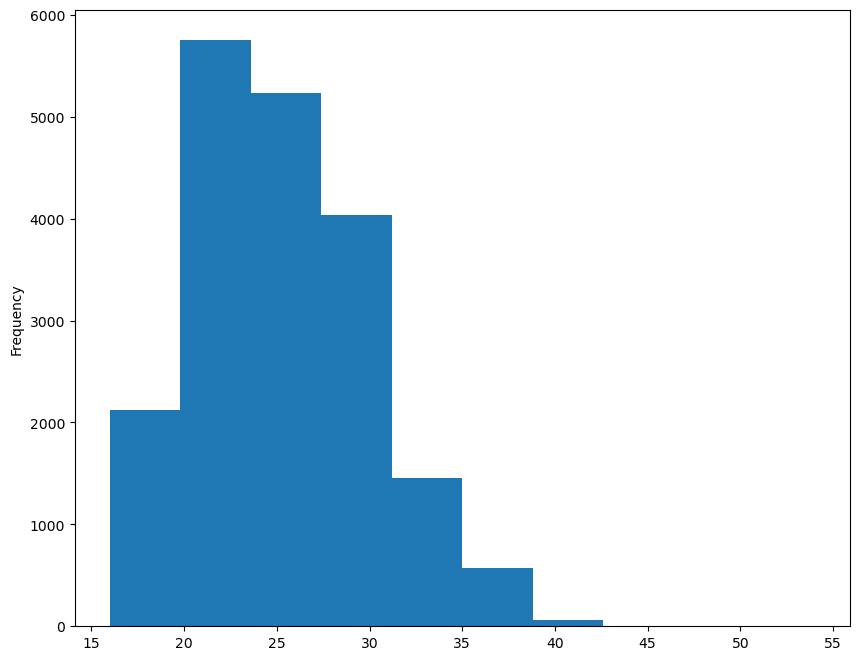

In [7]:
df['age'].plot(kind='hist', figsize=(10, 8))

<Axes: >

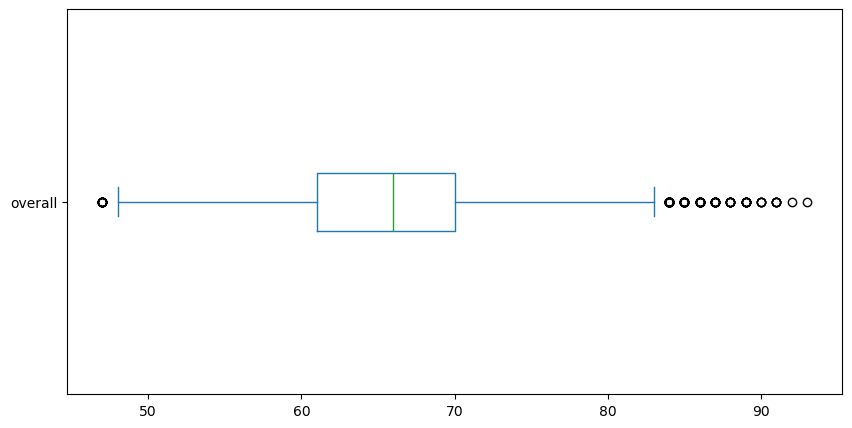

In [8]:
df['overall'].plot(kind='box', vert=False, figsize=(10, 5))

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_7128\1462740167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']);
c:\Users\DVadeus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


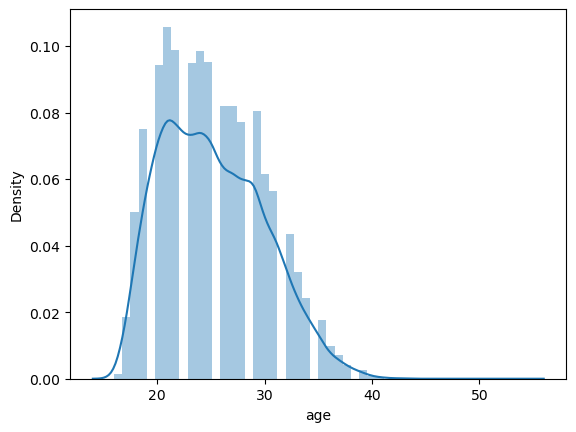

In [9]:
sns.distplot(df['age']);

<Axes: ylabel='count'>

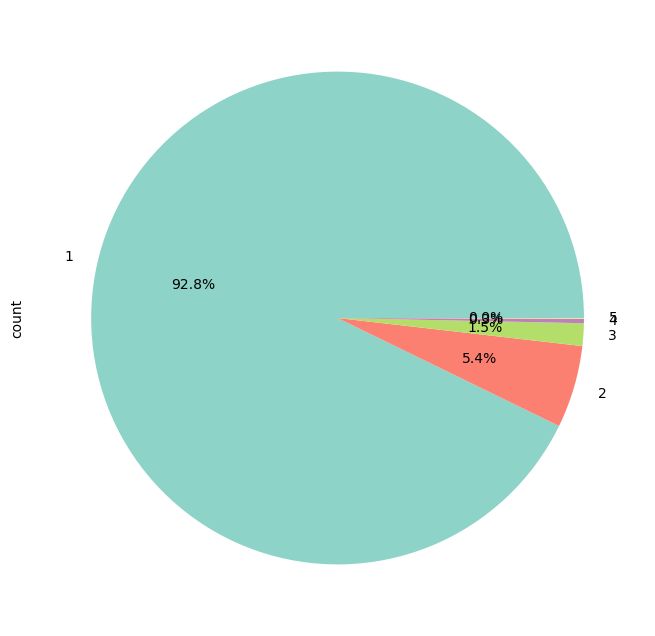

In [10]:
df['international_reputation'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

<Axes: ylabel='count'>

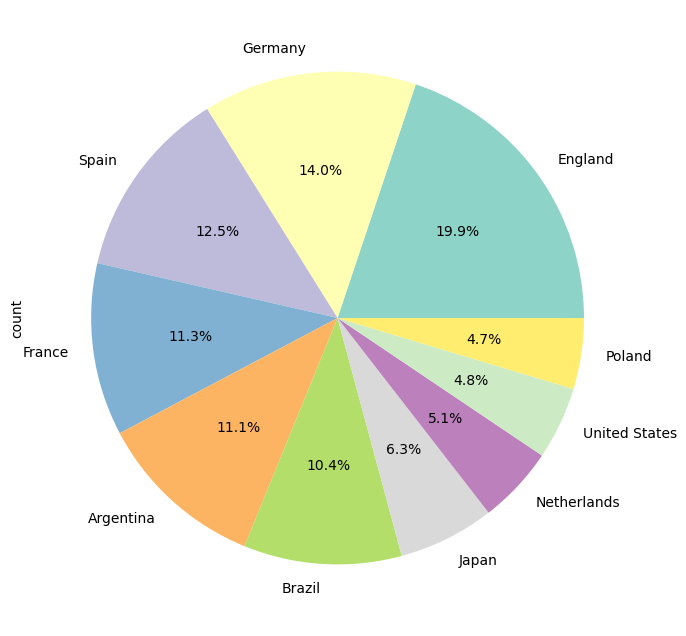

In [11]:
df['nationality_name'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

<Axes: ylabel='count'>

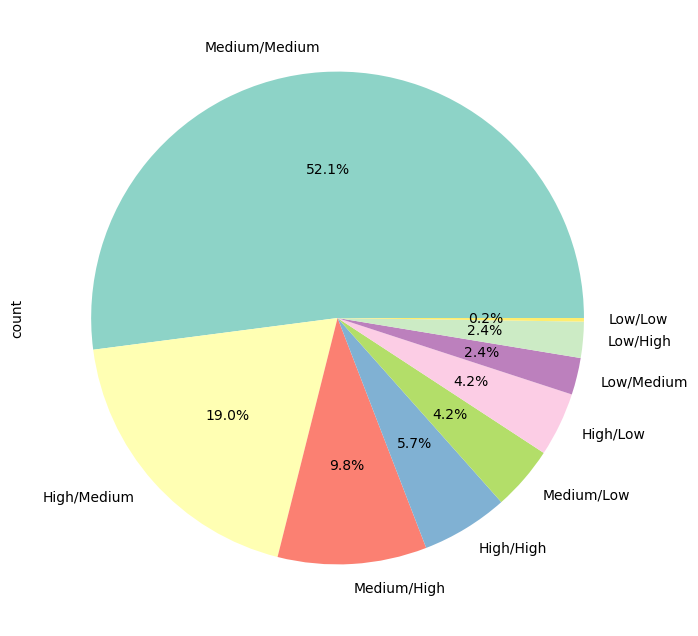

In [12]:
df['work_rate'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

## Activities

1. Select all the rows and the first 5 columns from the dataframe and store them in the variable ``df_first_five_cols``

    The first five columns with all their rows should be displayed to check the result.

In [13]:
df_first_five_cols = df.iloc[:,0:5:1]
df_first_five_cols

,sofifa_id,player_url,short_name,long_name,player_positions
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF"
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW"
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM"
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM"
...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST


2. Select Specific Columns in a Custom Order

    Choose all rows and extract columns with indices 3, 6, 4, and 1 from the DataFrame, arranging them in the specified order. Store your selection in the variable ``df_order_cols``. You can employ either ``.iloc`` or ``.loc`` for this task. This question builds upon the previous one, so consider experimenting with column indices.

In [14]:
df_order_cols = df.iloc[:,[3,6,4,1]]
df_order_cols

,long_name,potential,player_positions,player_url
0,Lionel Andrés Messi Cuccittini,93,"RW, ST, CF",https://sofifa.com/player/158023/lionel-messi/...
1,Robert Lewandowski,92,ST,https://sofifa.com/player/188545/robert-lewand...
2,Cristiano Ronaldo dos Santos Aveiro,91,"ST, LW",https://sofifa.com/player/20801/c-ronaldo-dos-...
3,Neymar da Silva Santos Júnior,91,"LW, CAM",https://sofifa.com/player/190871/neymar-da-sil...
4,Kevin De Bruyne,91,"CM, CAM",https://sofifa.com/player/192985/kevin-de-bruy...
...,...,...,...,...
19234,宋德福,52,CDM,https://sofifa.com/player/261962/defu-song/220002
19235,Caoimhin Porter,59,CM,https://sofifa.com/player/262040/caoimhin-port...
19236,Nathan Logue-Cunningham,55,CM,https://sofifa.com/player/262760/nathan-logue/...
19237,Luke Rudden,60,ST,https://sofifa.com/player/262820/luke-rudden/2...


3. Filter out first 50 rows from the Column number ``3``,``6``,``4``,``1`` into the variable ``fifty_rows``

    This question is just an extension of the above. Play with the row slicing.

In [15]:
fifty_rows = df.iloc[:50,[3,6,4,1]]
fifty_rows

,long_name,potential,player_positions,player_url
0,Lionel Andrés Messi Cuccittini,93,"RW, ST, CF",https://sofifa.com/player/158023/lionel-messi/...
1,Robert Lewandowski,92,ST,https://sofifa.com/player/188545/robert-lewand...
2,Cristiano Ronaldo dos Santos Aveiro,91,"ST, LW",https://sofifa.com/player/20801/c-ronaldo-dos-...
3,Neymar da Silva Santos Júnior,91,"LW, CAM",https://sofifa.com/player/190871/neymar-da-sil...
4,Kevin De Bruyne,91,"CM, CAM",https://sofifa.com/player/192985/kevin-de-bruy...
5,Jan Oblak,93,GK,https://sofifa.com/player/200389/jan-oblak/220002
6,Kylian Mbappé Lottin,95,"ST, LW",https://sofifa.com/player/231747/kylian-mbappe...
7,Manuel Peter Neuer,90,GK,https://sofifa.com/player/167495/manuel-neuer/...
8,Marc-André ter Stegen,92,GK,https://sofifa.com/player/192448/marc-andre-te...
9,Harry Kane,90,ST,https://sofifa.com/player/202126/harry-kane/22...


4. Select all the rows and the Columns ``['short_name','age','player_positions', 'overall', 'value_eur']`` from the dataframe store your selection in the variable ``named_cols``

    Whenever the names of columns are given always use ``df.loc[]``. (Location indexer/Label Indexer) Whenever the indices are given for rows or columns always go for ``df.iloc[]``. (Integer locator. And be careful indices start from 0)

In [16]:
named_cols = df.loc[:,['short_name','age','player_positions', 'overall', 'value_eur']]
named_cols

,short_name,age,player_positions,overall,value_eur
0,L. Messi,34,"RW, ST, CF",93,78000000.0
1,R. Lewandowski,32,ST,92,119500000.0
2,Cristiano Ronaldo,36,"ST, LW",91,45000000.0
3,Neymar Jr,29,"LW, CAM",91,129000000.0
4,K. De Bruyne,30,"CM, CAM",91,125500000.0
...,...,...,...,...,...
19234,Song Defu,22,CDM,47,70000.0
19235,C. Porter,19,CM,47,110000.0
19236,N. Logue,21,CM,47,100000.0
19237,L. Rudden,19,ST,47,110000.0


5. Filter out the first 14 rows and the Columns ``['short_name','age','player_positions', 'overall', 'value_eur']`` from the dataframe and store the result in the variable ``named_cols_rows``

    This question is just an extension of the previous question. Play with the row indices.

In [17]:
named_cols_rows = df.loc[:13,['short_name','age','player_positions', 'overall', 'value_eur']]
named_cols_rows

,short_name,age,player_positions,overall,value_eur
0,L. Messi,34,"RW, ST, CF",93,78000000.0
1,R. Lewandowski,32,ST,92,119500000.0
2,Cristiano Ronaldo,36,"ST, LW",91,45000000.0
3,Neymar Jr,29,"LW, CAM",91,129000000.0
4,K. De Bruyne,30,"CM, CAM",91,125500000.0
5,J. Oblak,28,GK,91,112000000.0
6,K. Mbappé,22,"ST, LW",91,194000000.0
7,M. Neuer,35,GK,90,13500000.0
8,M. ter Stegen,29,GK,90,99000000.0
9,H. Kane,27,ST,90,129500000.0


## Activities for ``df.loc``, ``df.query`` with Conditioning (``|`` or, ``&`` and, Not ``~``)

6. Find out how many players of overall rating greater than 90 exist in the dataset?

In [18]:
len(df.loc[df['overall'] > 90])

7

7. Find out how many players with a ``value_eur`` of less than or equal to ``20,000`` exist in the dataset

In [19]:
len(df.loc[df['value_eur'] <= 20_000]) 

10

8. Select the ``long_name`` and ``age`` of the players having the ``club_name='Manchester City'`` and store your selection in the variable name ``long_name_age``

    Here you have to incorporate the condition with filtering techniques learned in the previous page.

In [24]:
long_name_age = df[df['club_name'] == 'Manchester City'].loc[:,['long_name', 'age']]
long_name_age

,long_name,age
4,Kevin De Bruyne,30
18,Ederson Santana de Moraes,27
27,Raheem Sterling,26
46,Rúben dos Santos Gato Alves Dias,24
58,Riyad Mahrez,30
62,João Pedro Cavaco Cancelo,27
63,Aymeric Laporte,27
65,Bernardo Mota Veiga de Carvalho e Silva,26
67,Rodrigo Hernández Cascante,25
78,İlkay Gündoğan,30


In [ ]:
## Alternativas

df.query("club_name == 'Manchester City'")[['long_name', 'age']]
df[df['club_name']=='Manchester City'][['long_name','age']]
df.loc[df['club_name']=='Manchester City', ['long_name','age']]

9. Filter out the players who are players of Liverpool club and who are from Brazil and store them in the variable ``liverpool_brazil``

    Note: Use ``club_name`` & ``nationality_name``

In [33]:
liverpool_brazil = df[(df['club_name'] == 'Liverpool') & (df['nationality_name'] == 'Brazil')]
liverpool_brazil

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
20,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,GK,89,90,82000000.0,190000.0,28,...,31+3,31+3,31+3,30+3,87+3,https://cdn.sofifa.net/players/212/831/22_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png
61,209499,https://sofifa.com/player/209499/fabio-henriqu...,Fabinho,Fábio Henrique Tavares,"CDM, CB",86,88,73500000.0,165000.0,27,...,84+3,84+3,84+3,82+3,18+3,https://cdn.sofifa.net/players/209/499/22_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png
85,201942,https://sofifa.com/player/201942/roberto-firmi...,Roberto Firmino,Roberto Firmino Barbosa de Oliveira,CF,85,85,54000000.0,185000.0,29,...,67+3,67+3,67+3,69+3,17+3,https://cdn.sofifa.net/players/201/942/22_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png
17275,259430,https://sofifa.com/player/259430/marcelo-pital...,Marcelo Pitaluga,Marcelo Pitaluga,GK,57,78,475000.0,1000.0,18,...,21+2,21+2,21+2,18+2,56+2,https://cdn.sofifa.net/players/259/430/22_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png


10. How many players are there who have either ``mentality_aggression > 91`` or ``power_stamina < 80``

In [34]:
len(df[(df['mentality_aggression'] > 91) | (df['power_stamina'] < 80)])

16919

11. Select all players from France who have either ``mentality_aggression > 91`` or ``power_stamina < 80`` and store the filtered data in the variable ``france_player``

In [38]:
france_player = df[(df['mentality_aggression'] > 91) | (df['power_stamina'] < 80)].loc[df['nationality_name'] == 'France']
france_player

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
10,215914,https://sofifa.com/player/215914/ngolo-kante/2...,N. Kanté,N'Golo Kanté,"CDM, CM",90,90,100000000.0,230000.0,30,...,84+3,84+3,84+3,85+3,20+3,https://cdn.sofifa.net/players/215/914/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
11,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,"CF, ST",89,89,66000000.0,350000.0,33,...,55+3,55+3,55+3,59+3,18+3,https://cdn.sofifa.net/players/165/153/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
31,167948,https://sofifa.com/player/167948/hugo-lloris/2...,H. Lloris,Hugo Lloris,GK,87,87,13500000.0,125000.0,34,...,30+3,30+3,30+3,34+3,85+2,https://cdn.sofifa.net/players/167/948/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
37,195864,https://sofifa.com/player/195864/paul-pogba/22...,P. Pogba,Paul Pogba,"CM, LM",87,87,79500000.0,220000.0,28,...,72+3,72+3,72+3,72+3,13+3,https://cdn.sofifa.net/players/195/864/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
57,201535,https://sofifa.com/player/201535/raphael-varan...,R. Varane,Raphaël Varane,CB,86,88,68500000.0,180000.0,28,...,85+3,85+3,85+3,80+3,18+3,https://cdn.sofifa.net/players/201/535/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18375,263276,https://sofifa.com/player/263276/steven-goma/2...,S. Goma,Steven Goma,ST,54,65,230000.0,750.0,19,...,32+2,32+2,32+2,36+2,12+2,https://cdn.sofifa.net/players/263/276/22_120.png,https://cdn.sofifa.net/teams/113391/60.png,https://cdn.sofifa.net/flags/ro.png,NaN,https://cdn.sofifa.net/flags/fr.png
18381,263425,https://sofifa.com/player/263425/adrien-delphi...,A. Delphis,Adrien Delphis,CM,54,66,250000.0,500.0,18,...,46+2,46+2,46+2,50+2,16+2,https://cdn.sofifa.net/players/263/425/22_120.png,https://cdn.sofifa.net/teams/226/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/fr.png
18424,264501,https://sofifa.com/player/264501/ilyes-hamache...,I. Hamache,Ilyes Hamache,RW,54,69,250000.0,500.0,18,...,27+2,27+2,27+2,34+2,10+2,https://cdn.sofifa.net/players/264/501/22_120.png,https://cdn.sofifa.net/teams/110456/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/fr.png
18435,233645,https://sofifa.com/player/233645/beni-nkololo/...,B. Nkololo,Béni Nkololo,CAM,53,60,190000.0,500.0,24,...,39+2,39+2,39+2,44+2,14+2,https://cdn.sofifa.net/players/233/645/22_120.png,https://cdn.sofifa.net/teams/111396/60.png,https://cdn.sofifa.net/flags/au.png,NaN,https://cdn.sofifa.net/flags/fr.png


In [ ]:
france_player = df.loc[(df['nationality_name'] == 'France') & ((df['mentality_aggression'] > 91) | (df['power_stamina'] < 80))]

12. How many players have Left foot as their ``preferred_foot``, also print their ``short_name``,``age`` and ``preferred_foot``

    Store the result in the variable ``left_foot_players``.

In [41]:
left_foot_players = df[df['preferred_foot'] == 'Left'][['short_name','age','preferred_foot']]
left_foot_players

,short_name,age,preferred_foot
0,L. Messi,34,Left
12,T. Courtois,29,Left
17,M. Salah,29,Left
18,Ederson,27,Left
25,R. Lukaku,28,Left
...,...,...,...
19198,N. Rabha,24,Left
19202,J. Bradley-Walsh,20,Left
19204,Jiang Wenhao,21,Left
19214,R. Mahon,18,Left


# Practicing Filtering and Selection witth TED Talks Data

This project focuses on advanced conditional filtering using ``.loc`` and ``.query``.

The dataset we're using contains 4016 TED talks, ranging from 1972 to 2020, and containing some masterpieces like Sir Ken Robinson's "Do schools kill creativity?" and Simon Sinek's "How great leaders inspire action".

Loading the data and analysis of the dataset
We'll start by loading the data in a DataFrame and doing some quick analysis and visualizations. Feel free to skip this part if you're not interested and jump straight to the activities.

In [93]:
#to read the dataframe
import pandas as pd

#to plot
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Reading dataframe
df = pd.read_csv('TED_Talks.csv')

In [95]:
df.head()

,talk_id,name,speaker_name,description,speaker_occupation,talks_tags,duration,view_count,comment_count,event,film_date,published_date,language,number_of_subtitles,transcript,theme,month,year
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,Author,"['children', 'creativity', 'culture', 'dance',...",1164,65678748,4952.0,TED2006,2006-02-25,2006-06-27 00:11:00,en,61,Good morning. How are you?(Audience) Good.It's...,Culture,2,2006
1,2405,This is what happens when you reply to spam email,James Veitch,"Suspicious emails: unclaimed insurance bonds, ...",Writer,"['comedy', 'curiosity', 'communication', 'humo...",588,59725446,288.0,TEDGlobal>Geneva,2015-12-08,2016-01-08 16:03:40,en,47,"A few years ago, I got one of those spam email...",Technology,12,2015
2,1569,Your body language may shape who you are,Amy Cuddy,(NOTE: Some of the findings presented in this ...,Social Psychologist,"['body language', 'brain', 'business', 'psycho...",1262,57734063,2649.0,TEDGlobal 2012,2012-06-26,2012-10-01 15:00:08,en,50,So I want to start by offering you a free no-t...,Science,6,2012
3,848,How great leaders inspire action,Simon Sinek,Simon Sinek has a simple but powerful model fo...,Leadership Expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",1084,50494918,2093.0,TEDxPuget Sound,2009-09-17,2010-05-04 09:31:00,en,47,How do you explain when things don't go as we ...,Tedx,9,2009
4,1042,The power of vulnerability,Brené Brown,Brené Brown studies human connection -- our ab...,Storyteller,"['TEDx', 'communication', 'culture', 'depressi...",1219,48503432,2234.0,TEDxHouston,2010-06-06,2010-12-23 14:45:00,en,51,"So, I'll start with this: a couple years ago, ...",Culture,6,2010


## Discovering the dataset

In [96]:
#show the number of cells in the dataframe
print("dataset size: ", df.size)

#show the number of records (rows) in the dataframe
print("number of talks: ", len(df))

#show the number of features (columns) in the dataframe
print("number of features: ", len(df.columns)) 

dataset size:  72288
number of talks:  4016
number of features:  18


In [97]:
df.describe()

,talk_id,duration,view_count,comment_count,number_of_subtitles,month,year
count,4016.000000,4016.000000,4.016000e+03,3457.000000,4016.000000,4016.000000,4016.000000
mean,11977.641434,793.337400,1.924630e+06,160.974834,21.976843,6.340388,2013.678785
std,17957.802884,378.342735,3.474379e+06,268.366825,12.459637,3.472134,4.273631
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1972.000000
25%,1213.750000,566.000000,6.648510e+05,37.000000,16.000000,3.000000,2011.000000
50%,2298.500000,780.000000,1.277025e+06,88.000000,24.000000,6.000000,2014.000000
75%,16778.250000,994.000000,1.953194e+06,188.000000,30.000000,10.000000,2017.000000
max,64598.000000,5257.000000,6.567875e+07,6456.000000,71.000000,12.000000,2020.000000


In [98]:
df.dtypes

talk_id                  int64
name                    object
speaker_name            object
description             object
speaker_occupation      object
talks_tags              object
duration                 int64
view_count               int64
comment_count          float64
event                   object
film_date               object
published_date          object
language                object
number_of_subtitles      int64
transcript              object
theme                   object
month                    int64
year                     int64
dtype: object

In [99]:
#show the number of null values in each column with non-zero null values
nulls = df.isnull().sum()
nulls[nulls > 0]

comment_count    559
transcript       511
dtype: int64

In [100]:
# Create a new DataFrame with only the duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.size)

Number of duplicate rows:  0


In [101]:
df.T.head(18)

,0,1,2,3,4,5,6,7,8,9,...,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015
talk_id,66,2405,1569,848,1042,2034,2458,2225,13587,1647,...,19061,43411,46532,62238,15696,10569,9474,19784,41912,12818
name,Do schools kill creativity?,This is what happens when you reply to spam email,Your body language may shape who you are,How great leaders inspire action,The power of vulnerability,How to speak so that people want to listen,Inside the mind of a master procrastinator,The next outbreak? We're not ready,My philosophy for a happy life,"Looks aren't everything. Believe me, I'm a model.",...,Restoring hope and dignity to the justice system,The everyday beauty of playgrounds,Are our cultural narratives killing sharks?,Investing in health care workers strengthens c...,¿A quién pertenece el pasado?,Where are we trying to end up?,We are not mud,Designing materials one atom at a time,Why student journalists should be protected fr...,A tribute to West Virginia coal miners
speaker_name,Sir Ken Robinson,James Veitch,Amy Cuddy,Simon Sinek,Brené Brown,Julian Treasure,Tim Urban,Bill Gates,Sam Berns,Cameron Russell,...,Alexander McLean,Stefen Chow,Paul Cater Deaton,Raj Panjabi,Alberto Garín,Rach Ranton,Ise Lyfe,Sadasivan Shankar,Neha Madhira and Haley Stack,"Johnny Staats, Davey Vaughn"
description,Sir Ken Robinson makes an entertaining and pro...,"Suspicious emails: unclaimed insurance bonds, ...",(NOTE: Some of the findings presented in this ...,Simon Sinek has a simple but powerful model fo...,Brené Brown studies human connection -- our ab...,"Have you ever felt like you're talking, but no...",Tim Urban knows that procrastination doesn't m...,"In 2014, the world avoided a global outbreak o...",Born with a rare genetic disorder called proge...,"Cameron Russell admits she won ""a genetic lott...",...,You can learn a lot about the character of a c...,When photographer Stefen Chow took his young d...,Why do our cultural narratives about sharks ce...,Physician and 2017 TED Prize recipient Raj Pan...,¿Qué es lo que podemos poseer del pasado? ¿El ...,Drawing upon both her military and corporate c...,"""How will this generation define itself?"" asks...",The elements in the periodic table were create...,High school newspaper editors Neha Madhira and...,"By day, Johnny Staats is a UPS package car dri..."
speaker_occupation,Author,Writer,Social Psychologist,Leadership Expert,Storyteller,Sound Consultant,Blogger,Technologist,Activist,Model,...,Prison Anthropologist,Photographer,Cinematographer,Physician,Historiador,Veteran Leader,Spoken Word Artist,Designer,Journalist,Bluegrass Virtuoso
talks_tags,"['children', 'creativity', 'culture', 'dance',...","['comedy', 'curiosity', 'communication', 'humo...","['body language', 'brain', 'business', 'psycho...","['TEDx', 'business', 'entrepreneur', 'leadersh...","['TEDx', 'communication', 'culture', 'depressi...","['culture', 'sound', 'speech']","['brain', 'comedy', 'decision-making', 'entert...","['disaster relief', 'disease', 'ebola', 'globa...","['life', 'happiness', 'personal growth', 'self...","['TEDx', 'beauty', 'culture', 'fashion', 'phot...",...,"['prison', 'Africa', 'society']","['community', 'art', 'photography', 'environme...","['conservation', 'oceans', 'global issues', 'f...","['technology', 'health care', 'humanity', 'med...","['TED en Español', 'history', 'education', 'te...","['leadership', 'military', 'business']","['life', 'poetry', 'humanity', 'spoken word']","['computers', 'science', 'technology']","['journalism', 'education', 'social change', '...","['music', 'performance', 'mining', 'singer']"
duration,1164,588,1262,1084,1219,598,843,512,765,577,...,704,601,849,660,799,731,431,609,442,512
view_count,65678748,59725446,57734063,50494918,48503432,42330489,39714672,35814459,34858496,34572281,...,0,0,0,0,0,0,0,0,0,0
comment_count,4952.0,288.0,2649.0,2093.0,2234.0,411.0,579.0,494.0,NaN,926.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,TED2006,TEDGlobal>Geneva,TEDGlobal 2012,TEDxPuget Sound,TEDxHoust

## Data Visualization

### Most viewed talks
    
First step towards conducting the best TED-talk ever, is getting to know the competition. We will start with finding the most viewed talks so far on TED.

In [102]:
pop_talks = df[['name', 'speaker_name', 'view_count', 'published_date']].sort_values('view_count', ascending=False)[:15]
pop_talks

,name,speaker_name,view_count,published_date
0,Do schools kill creativity?,Sir Ken Robinson,65678748,2006-06-27 00:11:00
1,This is what happens when you reply to spam email,James Veitch,59725446,2016-01-08 16:03:40
2,Your body language may shape who you are,Amy Cuddy,57734063,2012-10-01 15:00:08
3,How great leaders inspire action,Simon Sinek,50494918,2010-05-04 09:31:00
4,The power of vulnerability,Brené Brown,48503432,2010-12-23 14:45:00
5,How to speak so that people want to listen,Julian Treasure,42330489,2014-06-27 14:38:17
6,Inside the mind of a master procrastinator,Tim Urban,39714672,2016-03-15 18:36:59
7,The next outbreak? We're not ready,Bill Gates,35814459,2015-04-03 14:58:45
8,My philosophy for a happy life,Sam Berns,34858496,2018-03-28 20:53:55
9,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,34572281,2013-01-16 16:05:54


**Observations:**

- Do schools kill creativity? by Sir Ken Robinson is the most viewed talk with almost **70 million** views.
- Bill Gates' talk about the pandemic is in 7th place with nearly **40 million views** .

Let's plot these plots in a bar chart

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Sir Ken Robinson'),
  Text(1, 0, 'James Veitch'),
  Text(2, 0, 'Amy Cuddy'),
  Text(3, 0, 'Simon Sinek'),
  Text(4, 0, 'Brené Brown'),
  Text(5, 0, 'Julian Treasure'),
  Text(6, 0, 'Tim Urban'),
  Text(7, 0, 'Bill Gates'),
  Text(8, 0, 'Sam Berns'),
  Text(9, 0, 'Cameron Russell'),
  Text(10, 0, 'Robert Waldinger'),
  Text(11, 0, 'Graham Shaw'),
  Text(12, 0, 'Mary Roach'),
  Text(13, 0, 'Tom Thum'),
  Text(14, 0, 'Pamela Meyer')])

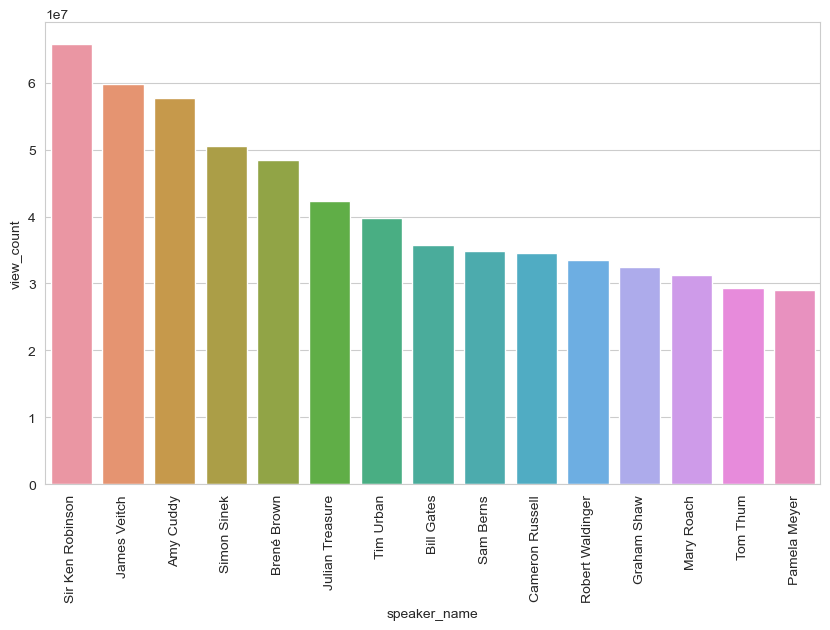

In [103]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
g = sns.barplot(x='speaker_name', y='view_count', data=pop_talks)
plt.xticks(rotation=90)

Okay, so the competition is tough, but aren't all worthy competitions are? let us investigate the summary statistics and the distribution of the views on various TED Talks.

c:\Users\DVadeus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 10000000.0)

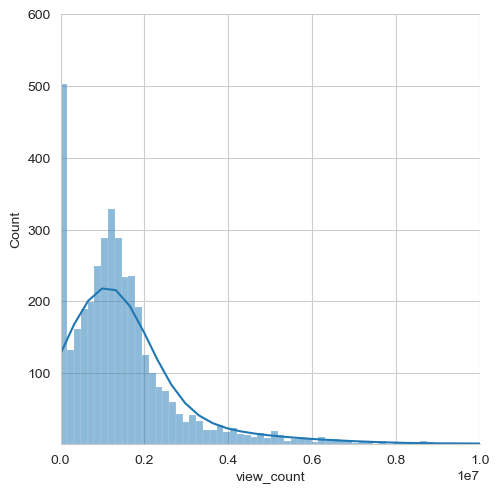

In [104]:
# The default plot for distplot is histogram so the videos are divided into equal-sized bins,
# kde = true shows a kernel density estimate to the data
sns.displot(df['view_count'], kde =True)
plt.ylim(1,600)
plt.xlim(0,1e7)

In [105]:
df['view_count'].describe()

count    4.016000e+03
mean     1.924630e+06
std      3.474379e+06
min      0.000000e+00
25%      6.648510e+05
50%      1.277025e+06
75%      1.953194e+06
max      6.567875e+07
Name: view_count, dtype: float64

**Observations**

- The average number of views on TED Talk videos is nearly **2 million** and the median is **1.3 million**. Good news! TED is popular. **If you ace your TED talk**, **your ideas will reach a large number of people**.

## Analysing TED Talks by the month and the year

What are the most frequent times for TED talks? How many months do you have left to prepare? We need to know when will the battle take place!

In [106]:
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()

month_df.columns = ['month', 'talks']

month_df

,month,talks
0,2,638
1,11,542
2,4,480
3,3,468
4,6,361
5,10,357
6,7,343
7,9,246
8,12,236
9,5,191


<Axes: xlabel='month', ylabel='talks'>

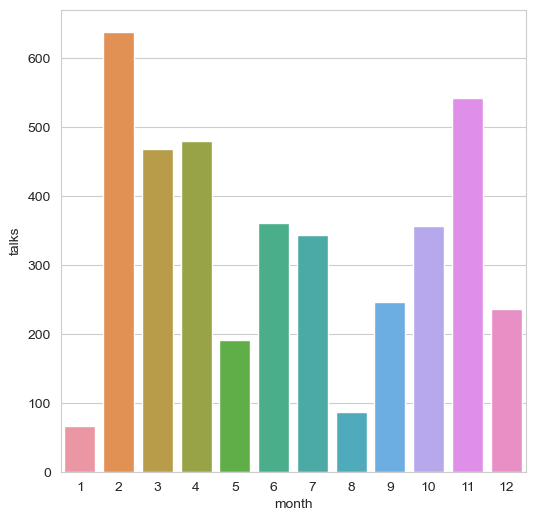

In [107]:
plt.figure(figsize = (6,6))
sns.barplot(x='month', y='talks', data=month_df)

**February** is clearly the most popular month for TED Conferences followed by **November** whereas **August** and **January** are the least popular. February's popularity is largely due to the fact that the official TED Conferences are held in February.

Finally, let's see how ted has grown over the year to see if it is truly worth it.

<Axes: xlabel='year', ylabel='talks'>

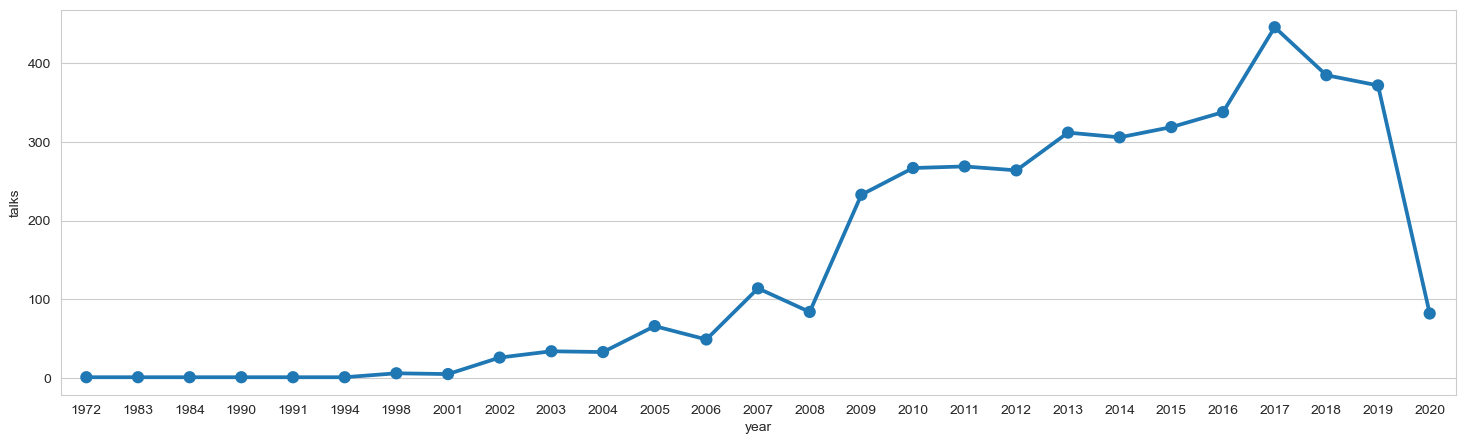

In [108]:
year_df = pd.DataFrame(df['year'].value_counts().reset_index())

year_df.columns = ['year', 'talks']

year_df = year_df.sort_values('year')

plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

**Observation**

- It appears that the number of talks have been increasing over the years and truly spiked in 2009.
- There is a sharp decrease in 2020 and we know the reason.

## Now let's see who is the most popular TED Talker

To beat them you have to join them. Who are the most likely to be invited on TED?

In [109]:
# First, seeing type of ted talk event
df['event'].value_counts()

event
TED2018                 104
TED2019                 101
TED2017                  97
TED2014                  84
TED2009                  84
                       ... 
TEDxEasthamptonWomen      1
TEDxSalem                 1
Toronto Youth Corps       1
TED@London                1
TEDxUFM                   1
Name: count, Length: 547, dtype: int64

In [110]:
speaker_df = df.groupby('speaker_name').count().reset_index()[['speaker_name', 'view_count']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
1707,Juan Enriquez,10
1272,Hans Rosling,9
1231,Greg Gage,8
2101,Marco Tempest,7
414,Bill Gates,6
2756,Rives,6
685,Dan Ariely,6
647,Clay Shirky,5
1088,Eve Ensler,5
1403,Jacqueline Novogratz,5


**Juan Enriquez** the mexican-amerian businessman & author and **Hans Rosling** the Swedish physician have the most talks on TED.

## What about the occupation of the speakers? Is there a special job that TED prefers its speakers to have?

In [111]:
occupation_df = df[df['speaker_occupation']!= 'Unknown'].groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'view_count']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
occupation_df

,occupation,appearances
107,Author,186
1609,Writer,167
537,Entrepreneur,107
88,Artist,85
8,Activist,85
...,...,...
625,Food Writer,1
624,Food Urbanist,1
623,Food Supply Strategist,1
622,Food Security Expert,1


<Axes: xlabel='occupation', ylabel='appearances'>

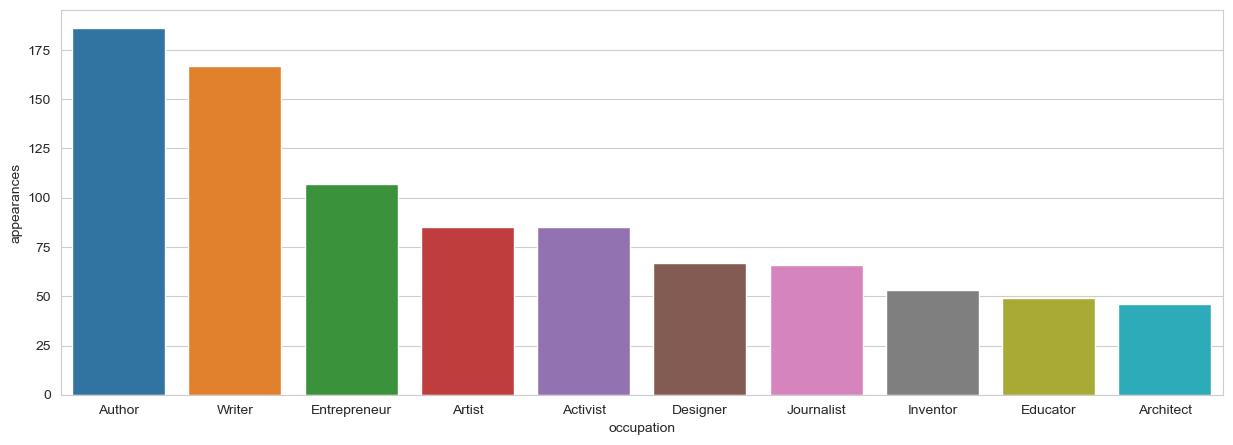

In [112]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))

**Observations** :

- **Authors** are the most popular with more than 175 speakers identifying themselves as the aforementioned.
- **Writers and Entrepreneurs** come in second and third place with near results

## What should your talk be about? Which themes attract most views?

In this section, we will try to find out the most popular themes in the TED conferences. Although TED started out as a conference about technology, entertainment and design, it has since diversified into virtually every field of study and walk of life. It will be interesting to see if this conference with Silicon Valley origins has a bias towards certain topics.

In [113]:
len(df['theme'].value_counts())

82

We have about 82 major themes in different TED talks

In [114]:
pop_themes = pd.DataFrame(df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,Technology,1021
1,Science,500
2,Culture,487
3,Society,378
4,Global Issues,274
5,Tedx,188
6,Design,154
7,Business,154
8,Entertainment,126
9,Social Change,96


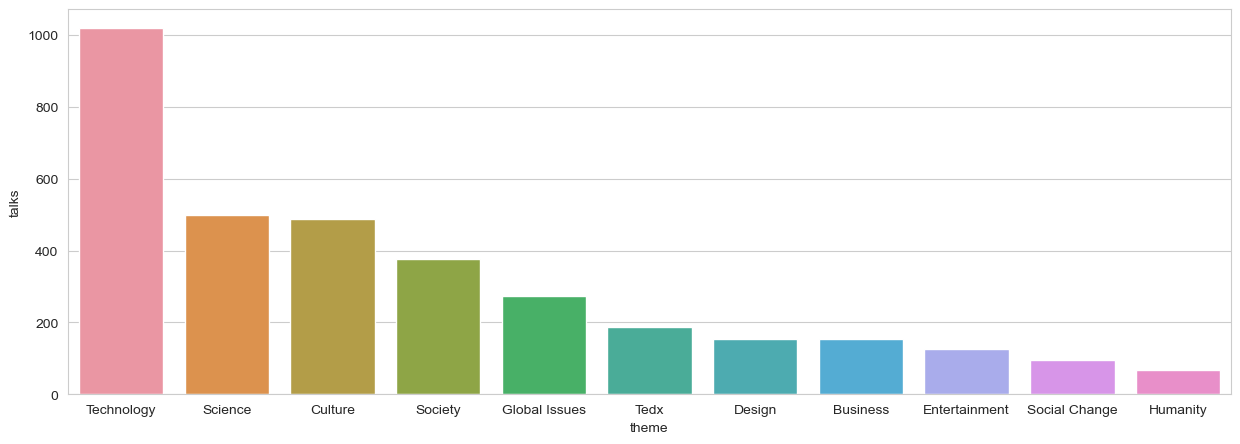

In [115]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(11))
plt.show()

**Observations**:

- As may have been expected, **Technology** is the most popular topic for talks, followed by **science** and **culture**

## Activities

1. Filter for talks that have a minimum of 1 million views (include only "view_count" then "speaker_name" columns in the subdataframe)

    Perform the selection and store the results in the variable ``df_more_than_1million``

In [116]:
df_more_than_1million = df[df['view_count'] > 1_000_000][['view_count','speaker_name']]
df_more_than_1million

,view_count,speaker_name
0,65678748,Sir Ken Robinson
1,59725446,James Veitch
2,57734063,Amy Cuddy
3,50494918,Simon Sinek
4,48503432,Brené Brown
...,...,...
2523,1001749,Dustin Schroeder
2524,1001668,Gregory Petsko
2525,1001604,His Holiness the Karmapa
2526,1000799,Dick M. Carpenter II


2. Filter all talks that have a comment count greater than 2,000 and are given by speakers with the occupation of "Artist"

    Perform the selection and store the results in the variable ``df_commented_artists``

In [117]:
df_commented_artists = df[(df['speaker_occupation'] == 'Artist') & (df['comment_count'] > 2000)]
df_commented_artists

,talk_id,name,speaker_name,description,speaker_occupation,talks_tags,duration,view_count,comment_count,event,film_date,published_date,language,number_of_subtitles,transcript,theme,month,year
762,1164,Taking imagination seriously,Janet Echelman,Janet Echelman found her true voice as an arti...,Artist,"['art', 'cities', 'culture', 'data', 'design',...",566,2315789,2531.0,TED2011,2011-03-03,2011-06-07 23:36:00,en,35,This story is about taking imagination serious...,Technology,3,2011


3. Filter all talks that have a duration of more than 60 minutes

    Perform the selection and store the results in the variable ``df_long_duration``

In [118]:
df_long_duration = df[df['duration'] > 3600]
df_long_duration

,talk_id,name,speaker_name,description,speaker_occupation,talks_tags,duration,view_count,comment_count,event,film_date,published_date,language,number_of_subtitles,transcript,theme,month,year
499,2695,Nationalism vs. globalism: the new political d...,Yuval Noah Harari,How do we make sense of today's political divi...,Author,"['big problems', 'climate change', 'collaborat...",3608,3068352,406.0,TED Dialogues,2017-02-15,2017-02-20 15:35:24,en,23,Chris Anderson: Hello. Welcome to this TED Dia...,Technology,2,2017
1361,54715,How we can turn the tide on climate,Christiana Figueres and Chris Anderson,"Witness the unveiling of Countdown, a major gl...",Head Of Ted,"['climate change', 'environment', 'activism', ...",3922,1676055,44.0,Countdown,2019-12-04,2019-12-12 14:17:45,en,0,[Citizens of the world][We face a global crisi...,Science,12,2019
1452,61930,It's OK to feel overwhelmed. Here's what to do...,Elizabeth Gilbert,If you're feeling anxious or fearful during th...,Writer,"['compassion', 'emotions', 'life', 'philosophy...",3740,1611321,42.0,TED Connects,2020-04-02,2020-04-03 15:03:11,en,1,"Chris Anderson: Well, hello, Helen. Very nice ...",Humanity,4,2020
1775,61900,Why sleep matters now more than ever,Matt Walker,A good night's sleep has perhaps never been mo...,Author,"['sleep', 'medicine', 'health', 'pandemic', 'b...",3641,1397509,31.0,TED Connects,2020-04-01,2020-04-02 13:52:50,en,0,NaN,Science,4,2020
2415,63996,The path to ending systemic racism in the US,"Dr. Phillip Atiba Goff, Rashad Robinson, Dr. B...",In a time of mourning and anger over the ongoi...,Ceo,"['race', 'social change', 'justice system', 'i...",3991,1064510,57.0,TED2020,2020-06-03,2020-06-03 21:40:23,en,1,"Chris Anderson: Hello, TED community, welcome ...",Society,6,2020
3054,730,Really achieving your childhood dreams,Randy Pausch,"In 2007, Carnegie Mellon professor Randy Pausc...",Professor,"['culture', 'disease', 'education', 'life', 's...",4587,628417,129.0,Carnegie Mellon University,2007-09-18,2010-01-08 11:32:00,en,0,NaN,Culture,9,2007
3209,798,"Parrots, the universe and everything",Douglas Adams,"Blind river dolphins, reclusive lemurs, a parr...",Author,"['biodiversity', 'biology', 'comedy', 'life', ...",5257,493537,103.0,University of California,2001-05-16,2010-03-16 17:54:00,en,0,NaN,Biology,5,2001
3234,61303,The quest for the coronavirus vaccine,Seth Berkley,When will the coronavirus vaccine be ready? Ep...,Vaccine Visionary,"['Vaccines', 'disease', 'public health', 'medi...",3760,474910,28.0,TED Connects,2020-03-26,2020-03-27 16:36:31,en,1,"Whitney Pennington Rodgers: Hello everyone, an...",Technology,3,2020
3451,61812,How we can navigate the coronavirus pandemic w...,Rabbi Lord Jonathan Sacks,Rabbi Lord Jonathan Sacks offers thoughts on h...,Religious Leader,"['community', 'social change', 'humanity', 'co...",3878,232747,34.0,TED Connects,2020-03-30,2020-03-30 23:37:32,en,0,NaN,Society,3,2020


4. Filter talks where the number of comments is greater than or equal to the duration

    Perform the selection and store the results in the variable ``df_high_comments``

In [119]:
df_high_comments = df[df['comment_count'] >= df['duration']]
df_high_comments

,talk_id,name,speaker_name,description,speaker_occupation,talks_tags,duration,view_count,comment_count,event,film_date,published_date,language,number_of_subtitles,transcript,theme,month,year
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,Author,"['children', 'creativity', 'culture', 'dance',...",1164,65678748,4952.0,TED2006,2006-02-25,2006-06-27 00:11:00,en,61,Good morning. How are you?(Audience) Good.It's...,Culture,2,2006
2,1569,Your body language may shape who you are,Amy Cuddy,(NOTE: Some of the findings presented in this ...,Social Psychologist,"['body language', 'brain', 'business', 'psycho...",1262,57734063,2649.0,TEDGlobal 2012,2012-06-26,2012-10-01 15:00:08,en,50,So I want to start by offering you a free no-t...,Science,6,2012
3,848,How great leaders inspire action,Simon Sinek,Simon Sinek has a simple but powerful model fo...,Leadership Expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",1084,50494918,2093.0,TEDxPuget Sound,2009-09-17,2010-05-04 09:31:00,en,47,How do you explain when things don't go as we ...,Tedx,9,2009
4,1042,The power of vulnerability,Brené Brown,Brené Brown studies human connection -- our ab...,Storyteller,"['TEDx', 'communication', 'culture', 'depressi...",1219,48503432,2234.0,TEDxHouston,2010-06-06,2010-12-23 14:45:00,en,51,"So, I'll start with this: a couple years ago, ...",Culture,6,2010
9,1647,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,"Cameron Russell admits she won ""a genetic lott...",Model,"['TEDx', 'beauty', 'culture', 'fashion', 'phot...",577,34572281,926.0,TEDxMidAtlantic,2012-10-27,2013-01-16 16:05:54,en,44,"Hi. My name is Cameron Russell, and for the la...",Culture,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,1662,I think we all need a pep talk,Kid President,"Kid President commands you to wake up, listen ...",Inspirer,"['children', 'humor', 'comedy']",208,973562,253.0,SoulPancake,2013-01-24,2013-02-01 16:07:02,en,0,NaN,Children,1,2013
2586,535,What comes after An Inconvenient Truth?,Al Gore,"At TED2009, Al Gore presents updated slides fr...",Climate Advocate,"['alternative energy', 'climate change', 'ener...",464,967689,862.0,TED2009,2009-02-06,2009-05-07 01:00:00,en,47,Last year I showed these two slides so that de...,Technology,2,2009
2901,747,What teachers make,Taylor Mali,"Ever heard the phrase ""Those who can't do, tea...",Slam Poet,"['education', 'performance', 'poetry', 'writing']",183,761988,190.0,Bowery Poetry Club,2005-11-12,2010-01-23 13:16:00,en,0,NaN,Education,11,2005
3076,997,E-voting without fraud,David Bismark,David Bismark demos a new system for voting th...,Voting System Designer,"['culture', 'democracy', 'design', 'global iss...",422,610757,838.0,TEDGlobal 2010,2010-07-14,2010-11-02 08:14:00,en,36,So there are a few things that bring us humans...,Technology,7,2010


5. Filter talks where the duration is not greater than nor equal to the average duration

    Perform the selection and store the results in the variable ``df_short_talks``

In [120]:
df_short_talks = df[df['duration'] <= df['duration'].mean()]
df_short_talks

,talk_id,name,speaker_name,description,speaker_occupation,talks_tags,duration,view_count,comment_count,event,film_date,published_date,language,number_of_subtitles,transcript,theme,month,year
1,2405,This is what happens when you reply to spam email,James Veitch,"Suspicious emails: unclaimed insurance bonds, ...",Writer,"['comedy', 'curiosity', 'communication', 'humo...",588,59725446,288.0,TEDGlobal>Geneva,2015-12-08,2016-01-08 16:03:40,en,47,"A few years ago, I got one of those spam email...",Technology,12,2015
5,2034,How to speak so that people want to listen,Julian Treasure,"Have you ever felt like you're talking, but no...",Sound Consultant,"['culture', 'sound', 'speech']",598,42330489,411.0,TEDGlobal 2013,2013-06-10,2014-06-27 14:38:17,en,45,The human voice: It's the instrument we all pl...,Culture,6,2013
7,2225,The next outbreak? We're not ready,Bill Gates,"In 2014, the world avoided a global outbreak o...",Technologist,"['disaster relief', 'disease', 'ebola', 'globa...",512,35814459,494.0,TED2015,2015-03-18,2015-04-03 14:58:45,en,42,"When I was a kid, the disaster we worried abou...",Global Issues,3,2015
8,13587,My philosophy for a happy life,Sam Berns,Born with a rare genetic disorder called proge...,Activist,"['life', 'happiness', 'personal growth', 'self...",765,34858496,NaN,TEDxMidAtlantic 2013,2013-10-25,2018-03-28 20:53:55,en,0,"Hello everyone. I'm Sam, and I just turned 17....",Personal Growth,10,2013
9,1647,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,"Cameron Russell admits she won ""a genetic lott...",Model,"['TEDx', 'beauty', 'culture', 'fashion', 'phot...",577,34572281,926.0,TEDxMidAtlantic,2012-10-27,2013-01-16 16:05:54,en,44,"Hi. My name is Cameron Russell, and for the la...",Culture,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,10569,Where are we trying to end up?,Rach Ranton,Drawing upon both her military and corporate c...,Veteran Leader,"['leadership', 'military', 'business']",731,0,NaN,TED@Westpac,2017-12-11,2018-02-15 17:13:10,en,0,NaN,Business,12,2017
4012,9474,We are not mud,Ise Lyfe,"""How will this generation define itself?"" asks...",Spoken Word Artist,"['life', 'poetry', 'humanity', 'spoken word']",431,0,NaN,TED@IBM,2016-11-15,2018-02-12 14:58:00,en,0,NaN,Humanity,11,2016
4013,19784,Designing materials one atom at a time,Sadasivan Shankar,The elements in the periodic table were create...,Designer,"['computers', 'science', 'technology']",609,0,NaN,TED@Intel,2013-03-27,2018-07-30 21:13:42,en,0,NaN,Technology,3,2013
4014,41912,Why student journalists should be protected fr...,Neha Madhira and Haley Stack,High school newspaper editors Neha Madhira and...,Journalist,"['journalism', 'education', 'social change', '...",442,0,NaN,TEDWomen 2018,2018-11-28,2019-05-28 21:05:49,en,0,NaN,Society,11,2018


6. Filter all talks that have a view count greater than 10 million, are given in the English language, and are themed with "Culture"

    Perform the selection and store the results in the variable ``df_popular_english_culture``

In [121]:
df_popular_english_culture = df[(df['view_count'] > 10_000_000) & (df['language'] == 'en') & (df['theme'] == 'Culture')]
df_popular_english_culture.head()

,talk_id,name,speaker_name,description,speaker_occupation,talks_tags,duration,view_count,comment_count,event,film_date,published_date,language,number_of_subtitles,transcript,theme,month,year
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,Author,"['children', 'creativity', 'culture', 'dance',...",1164,65678748,4952.0,TED2006,2006-02-25,2006-06-27 00:11:00,en,61,Good morning. How are you?(Audience) Good.It's...,Culture,2,2006
4,1042,The power of vulnerability,Brené Brown,Brené Brown studies human connection -- our ab...,Storyteller,"['TEDx', 'communication', 'culture', 'depressi...",1219,48503432,2234.0,TEDxHouston,2010-06-06,2010-12-23 14:45:00,en,51,"So, I'll start with this: a couple years ago, ...",Culture,6,2010
5,2034,How to speak so that people want to listen,Julian Treasure,"Have you ever felt like you're talking, but no...",Sound Consultant,"['culture', 'sound', 'speech']",598,42330489,411.0,TEDGlobal 2013,2013-06-10,2014-06-27 14:38:17,en,45,The human voice: It's the instrument we all pl...,Culture,6,2013
9,1647,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,"Cameron Russell admits she won ""a genetic lott...",Model,"['TEDx', 'beauty', 'culture', 'fashion', 'phot...",577,34572281,926.0,TEDxMidAtlantic,2012-10-27,2013-01-16 16:05:54,en,44,"Hi. My name is Cameron Russell, and for the la...",Culture,10,2012
18,1377,The power of introverts,Susan Cain,In a culture where being social and outgoing a...,Quiet Revolutionary,"['business', 'culture', 'psychology', 'introve...",1144,26452711,1320.0,TED2012,2012-02-28,2012-03-02 20:28:12,en,46,"When I was nine years old, I went off to summe...",Culture,2,2012


7. Filter all talks that have a view count between 1 million and 2 million inclusive, were published after January 1, 2019, and are themed with either "Science" or "Technology"

    Perform the selection and store the results in the variable ``df_medium_science_tech``

In [122]:
df_medium_science_tech = df[((df['view_count'] > 1_000_000) & (df['view_count'] <= 2_000_000)) & (df['published_date'] > '2019-01-01') & ((df['theme'] == 'Science')|(df['theme'] == 'Technology'))]
df_medium_science_tech.head()

,talk_id,name,speaker_name,description,speaker_occupation,talks_tags,duration,view_count,comment_count,event,film_date,published_date,language,number_of_subtitles,transcript,theme,month,year
977,39941,How supercharged plants could slow climate change,Joanne Chory,Plants are amazing machines -- for millions of...,Plant Geneticist,"['plants', 'Audacious Project', 'biology', 'An...",828,1986983,41.0,TED2019,2019-04-16,2019-05-02 14:49:18,en,17,I recently had an epiphany. I realized that I ...,Science,4,2019
979,34369,What if all US health care costs were transpar...,Jeanne Pinder,"In the US, the very same blood test can cost $...",Journalist,"['health care', 'health', 'data', 'economics',...",424,1983607,86.0,TED Residency,2018-12-05,2019-02-20 15:43:56,en,19,"So, a little while ago, members of my family h...",Technology,12,2018
986,52673,How civilization could destroy itself -- and 4...,Nick Bostrom,"Humanity is on its way to creating a ""black ba...",Philosopher,"['future', 'technology', 'machine learning', '...",1269,1970049,30.0,TED2019,2019-04-15,2019-12-19 15:58:22,en,15,"Chris Anderson: Nick Bostrom. So, you have alr...",Technology,4,2019
991,49067,We need to track the world's water like we tra...,Sonaar Luthra,"We need a global weather service for water, sa...",Water Risk Forecaster,"['water', 'sustainability', 'climate change', ...",809,1963052,23.0,TEDSummit 2019,2019-07-20,2019-09-20 14:52:47,en,14,We need to build a weather service for water. ...,Science,7,2019
992,39584,How hip-hop helps us understand science,Danielle N. Lee,"In the early 1990s, a scandal rocked evolution...",Behavioral Biologist,"['education', 'TED Fellows', 'science', 'biolo...",496,1962945,18.0,TED2019,2019-04-15,2019-04-19 15:10:21,en,15,How y'all doing? Good. I came here to give you...,Science,4,2019


In [123]:
len(df_medium_science_tech)

87

8. Select the speaker name of the highest talk in views which published in Jan or Aug and its speaker is 'Journalist' or 'Entrepreneur' and its duration is less than 8 min

- **Note**: make sure to extract the month from published_date column; do not use the already provided month column in the dataframe as it does not relate to the published date, name it as ``published_month``.

- First, Filter talks that were published in either January or August and store the result in ``df_jan_aug``.

- Second, apply a filter on the first step's result by filtering talks with speakers who are journalists or entrepreneurs and store the result in ``df_journalists_entrepreneurs``.

- Third, apply a filter on the second step's result by filtering talks with a duration of less than 8 minutes (480 seconds) and store the result in ``df_below_8m_talks``.

- Finally, Perform the selection and store the final result in the variable ``highest_view_talk_speaker``

In [162]:
# Filter talks that were published in either January or August
df_jan_aug = df[(pd.DatetimeIndex(df['published_date']).month == 1) | (pd.DatetimeIndex(df['published_date']).month == 8)]

# Filter talks with speakers who are journalists or entrepreneurs
df_journalists_entrepreneurs = df_jan_aug[(df_jan_aug['speaker_occupation'] == 'Entrepreneur') | (df_jan_aug['speaker_occupation'] == 'Journalist')]

# Filter talks with a duration of less than 8 minutes (480 seconds)
df_below_8m_talks = df_journalists_entrepreneurs[df_journalists_entrepreneurs['duration'] < 480]

# Get the talk with the highest views
highest_view_talk_speaker = df_below_8m_talks.sort_values(by=['view_count'], ascending = False).iloc[0]['speaker_name']

In [163]:
highest_view_talk_speaker

'Arianna Huffington'

9. Select the ``name``, ``speaker_name``, and ``event`` columns for talks where the ``view_count`` exceeds the average ``view_count`` by three times the standard deviation of the ``view_count``

    Perform the selection and store the results in the variable ``df_talks_more_than_std``

In [168]:
df_talks_more_than_std = df[df['view_count'] > (df['view_count'].mean()+df['view_count'].std()*3)][['name','speaker_name','event']]
df_talks_more_than_std

,name,speaker_name,event
0,Do schools kill creativity?,Sir Ken Robinson,TED2006
1,This is what happens when you reply to spam email,James Veitch,TEDGlobal>Geneva
2,Your body language may shape who you are,Amy Cuddy,TEDGlobal 2012
3,How great leaders inspire action,Simon Sinek,TEDxPuget Sound
4,The power of vulnerability,Brené Brown,TEDxHouston
5,How to speak so that people want to listen,Julian Treasure,TEDGlobal 2013
6,Inside the mind of a master procrastinator,Tim Urban,TED2016
7,The next outbreak? We're not ready,Bill Gates,TED2015
8,My philosophy for a happy life,Sam Berns,TEDxMidAtlantic 2013
9,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,TEDxMidAtlantic


In [167]:
df['view_count'].std()*3

10423136.994785067

10. Select all talks that are either in English 'en' and have a duration greater than 10 minutes or are in Spanish 'es' and have a duration greater than 5 minutes

    Perform the selection and store the results in the variable ``df_long_en_es_talks``

In [169]:
df_long_en_es_talks = df[((df['language'] == 'en') & (df['duration'] > 600)) | ((df['language'] == 'es') &  (df['duration'] > 300))]

,talk_id,name,speaker_name,description,speaker_occupation,talks_tags,duration,view_count,comment_count,event,film_date,published_date,language,number_of_subtitles,transcript,theme,month,year
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,Author,"['children', 'creativity', 'culture', 'dance',...",1164,65678748,4952.0,TED2006,2006-02-25,2006-06-27 00:11:00,en,61,Good morning. How are you?(Audience) Good.It's...,Culture,2,2006
2,1569,Your body language may shape who you are,Amy Cuddy,(NOTE: Some of the findings presented in this ...,Social Psychologist,"['body language', 'brain', 'business', 'psycho...",1262,57734063,2649.0,TEDGlobal 2012,2012-06-26,2012-10-01 15:00:08,en,50,So I want to start by offering you a free no-t...,Science,6,2012
3,848,How great leaders inspire action,Simon Sinek,Simon Sinek has a simple but powerful model fo...,Leadership Expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",1084,50494918,2093.0,TEDxPuget Sound,2009-09-17,2010-05-04 09:31:00,en,47,How do you explain when things don't go as we ...,Tedx,9,2009
4,1042,The power of vulnerability,Brené Brown,Brené Brown studies human connection -- our ab...,Storyteller,"['TEDx', 'communication', 'culture', 'depressi...",1219,48503432,2234.0,TEDxHouston,2010-06-06,2010-12-23 14:45:00,en,51,"So, I'll start with this: a couple years ago, ...",Culture,6,2010
6,2458,Inside the mind of a master procrastinator,Tim Urban,Tim Urban knows that procrastination doesn't m...,Blogger,"['brain', 'comedy', 'decision-making', 'entert...",843,39714672,579.0,TED2016,2016-02-16,2016-03-15 18:36:59,en,43,"So in college, I was a government major, which...",Entertainment,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,46532,Are our cultural narratives killing sharks?,Paul Cater Deaton,Why do our cultural narratives about sharks ce...,Cinematographer,"['conservation', 'oceans', 'global issues', 'f...",849,0,NaN,TEDxSaintThomas,2016-06-25,2019-07-30 17:22:06,en,0,NaN,Culture,6,2016
4009,62238,Investing in health care workers strengthens c...,Raj Panjabi,Physician and 2017 TED Prize recipient Raj Pan...,Physician,"['technology', 'health care', 'humanity', 'med...",660,0,NaN,We the Future,2019-09-24,2020-04-10 14:25:57,en,0,NaN,Technology,9,2019
4010,15696,¿A quién pertenece el pasado?,Alberto Garín,¿Qué es lo que podemos poseer del pasado? ¿El ...,Historiador,"['TED en Español', 'history', 'education', 'te...",799,0,NaN,TEDxUFM,2015-01-20,2018-07-18 20:14:51,es,0,NaN,Education,1,2015
4011,10569,Where are we trying to end up?,Rach Ranton,Drawing upon both her military and corporate c...,Veteran Leader,"['leadership', 'military', 'business']",731,0,NaN,TED@Westpac,2017-12-11,2018-02-15 17:13:10,en,0,NaN,Business,12,2017
